This notebook was prepared by [Shreyas Kumbhar](https://github.com/shreyask98/).

Problem Statement :  


In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

Business Problem

It is desirable to develop a machine learning model that can predict customers who will leave the company. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

In this project, the dataset named Telco Customer Churn from Kaggle was used. Each row represents a customer, each column contains the customer's attributes. This dataset contains 21 columns (variables) and 7043 rows (customers) with information such as customerID, gender, Phone Service, and Internet Service. Table 1 shows the data types of the variables with 17 categorical and 4 numerical data.

Dataset Attributes


customerID : Customer ID  
gender : Whether the customer is a male or a female  
SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)  
Partner : Whether the customer has a partner or not (Yes, No)  
Dependents : Whether the customer has dependents or not (Yes, No)  
tenure : Number of months the customer has stayed with the company  
PhoneService : Whether the customer has a phone service or not (Yes, No)  
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)  
InternetService : Customer’s internet service provider (DSL, Fiber optic, No)  
OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)  
OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)  
DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)  
TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)  
StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)  
StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)  
Contract : The contract term of the customer (Month-to-month, One year, Two year)  
PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)  
PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
MonthlyCharges : The amount charged to the customer monthly  
TotalCharges : The total amount charged to the customer  
Churn : Whether the customer churned or not (Yes or No)  

# Step1: Problem Definition

The key challenge is to predict if an individual customer will churn or not.To accomplish that, machine learning models are trained based on 80% of the sample data. The remaining 20% are used to apply the trained models and assess their predictive power with regards to “churn / not churn”.

To compare models and select the best for this task, the accuracy is measured. Based on other characteristics of the data, for example the balance between classes (number of “churners” vs. “non-churners” in data set) further metrics are considered if needed.

# Step2: Data Collection

The data set for this classification problem is taken from Kaggle and stems from the IBM sample data set collection (https://www.kaggle.com/blastchar/telco-customer-churn).
The use case pipeline build-up is started with imports of some basic libraries that are needed throughout the case. This includes Pandas and Numpy for data handling and processing as well as Matplotlib and Seaborn for visualization.

In [2]:
# for data manipulation
import pandas as pd
import numpy as np

# for visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
# The first step of the analysis consists of reading and storing the data in a Pandas data frame using
# the pandas.read_csv function.
data = pd.read_csv(r"C:\Users\shrey\Documents\GitHub\Telcom Customer Churn\Telcom-Customer-Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# The shape of the data
print("The shape of the data set:")
print(f"The data set consists of {data.shape[0]} rows and {data.shape[1]} columns.")

print('\n***********************************************')
 # Missing Values Check
print("The existence of missing values in each column:")
print(data.isnull().any())

print('\n***********************************************')
# Info of the data
print("General information about the data:")
print(data.info())

print('\n***********************************************')
# Number of unique values in each column
print("The number of unique values in each column:")
print(data.nunique())


The shape of the data set:
The data set consists of 7043 rows and 21 columns.

***********************************************
The existence of missing values in each column:
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

***********************************************
General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            -----

## Data Processing for EDA


In [7]:
print(data.columns)
print('\n***********************************************')
print(data.dtypes)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

***********************************************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn     

#### here we seen "SeniorCitizen" is a categorical and "TotalCharges" is Numeric feature, so change the data types of both

In [8]:
# By using pandas DataFrame.astype() and pandas.to_numeric() methods you can convert a column from string/int type to float. 

# Changing the data type of "TotalCharges" and "SeniorCitizen" 

data['SeniorCitizen'] = data['SeniorCitizen'].astype('O')

# Convert DataFrame column from string to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  
 # If 'coerce', then invalid parsing will be set as NaN.
    
# print dataframe
df_SeniorCharg = pd.DataFrame(data[["SeniorCitizen","TotalCharges"]])
df_SeniorCharg
df_SeniorCharg.dtypes

SeniorCitizen     object
TotalCharges     float64
dtype: object

In [9]:
# Renaming the data values of "paymentMethod" for better readability
payment_column = {'Electronic check': 'E-Check' ,'Mailed check': 'Mailed Check','Bank transfer (automatic)': 'Bank Transfer',
                  'Credit card (automatic)':'Credit Card'}
data["PaymentMethod"].replace(payment_column, inplace=True)

# print dataframe
df_PaymentMethod = pd.DataFrame(data["PaymentMethod"])
df_PaymentMethod

,PaymentMethod
0,E-Check
1,Mailed Check
2,Mailed Check
3,Bank Transfer
4,E-Check
...,...
7038,Mailed Check
7039,Credit Card
7040,E-Check
7041,Mailed Check


In [10]:
## Check duplicates records count.
data.duplicated().sum()

0

In [11]:
# Checking dataset for NAN Values
# Counting the number of missing values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above analysis it is shown that,there are 11 missing values for “TotalCharges”. The respective data entries (=rows) will be deleted for simplicity.

In [12]:
# Mean of TotalCharges
np.mean(data['TotalCharges'])

2283.3004408418697

In [13]:
# fil null values with mean
data['TotalCharges'].fillna(np.mean(data['TotalCharges']), inplace=True)

# Step3: Exploratory Data Analysis

#### In Data Analysis We will Analyze To Find out the below stuff
1. Frequency distribution for churn
2. All The Numerical Variablesand  Categorical Variables  
3. Categorical Features vs Target Variable (Churn)
4. Numerical Features vs Target Variable (Churn)
<!-- 7. Relationship between independent and dependent feature(Churn) -->

In [14]:
yes = len(data[data['Churn']=='Yes'])
no = len(data[data['Churn']=='No'])

yes = yes / data.shape[0] * 100
no = no / data.shape[0] * 100
yes = np.round(yes ,2)
no = np.round(no ,2)
print('\n***********************************************')
print('There are',yes,'% former customers.')
print('There are',no,'% current customers.')
print('\n***********************************************')


***********************************************
There are 26.54 % former customers.
There are 73.46 % current customers.

***********************************************


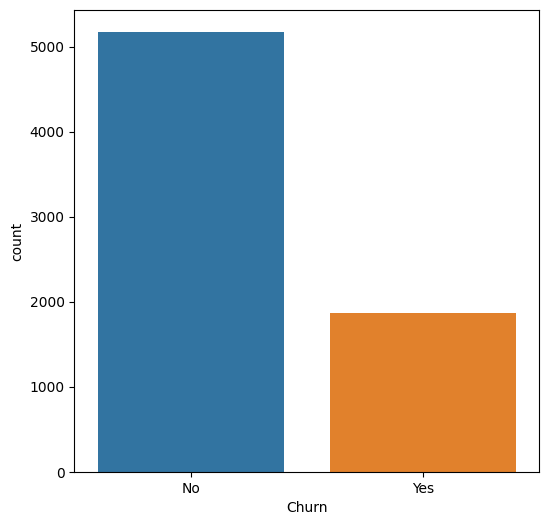

In [15]:
# Frequency distribution for churn
plt.figure(figsize=(6,6))
ax = sns.countplot(x=data['Churn'])
plt.show()

1. The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
2. Due to this, predictions will be biased towards Not-Churn customers.
3. Visualizations will also display this bias!

4. 26.54 % of customers switched to another firm.


### Univariant Analysis

In [16]:
cat = [i for i in data.columns if data[i].dtype == 'O']
cat.remove("customerID")
cat.remove("Churn")
print(len(cat))
cat.count
num = [i for i in data.columns if data[i].dtype != 'O']
print(len(num))

16
3


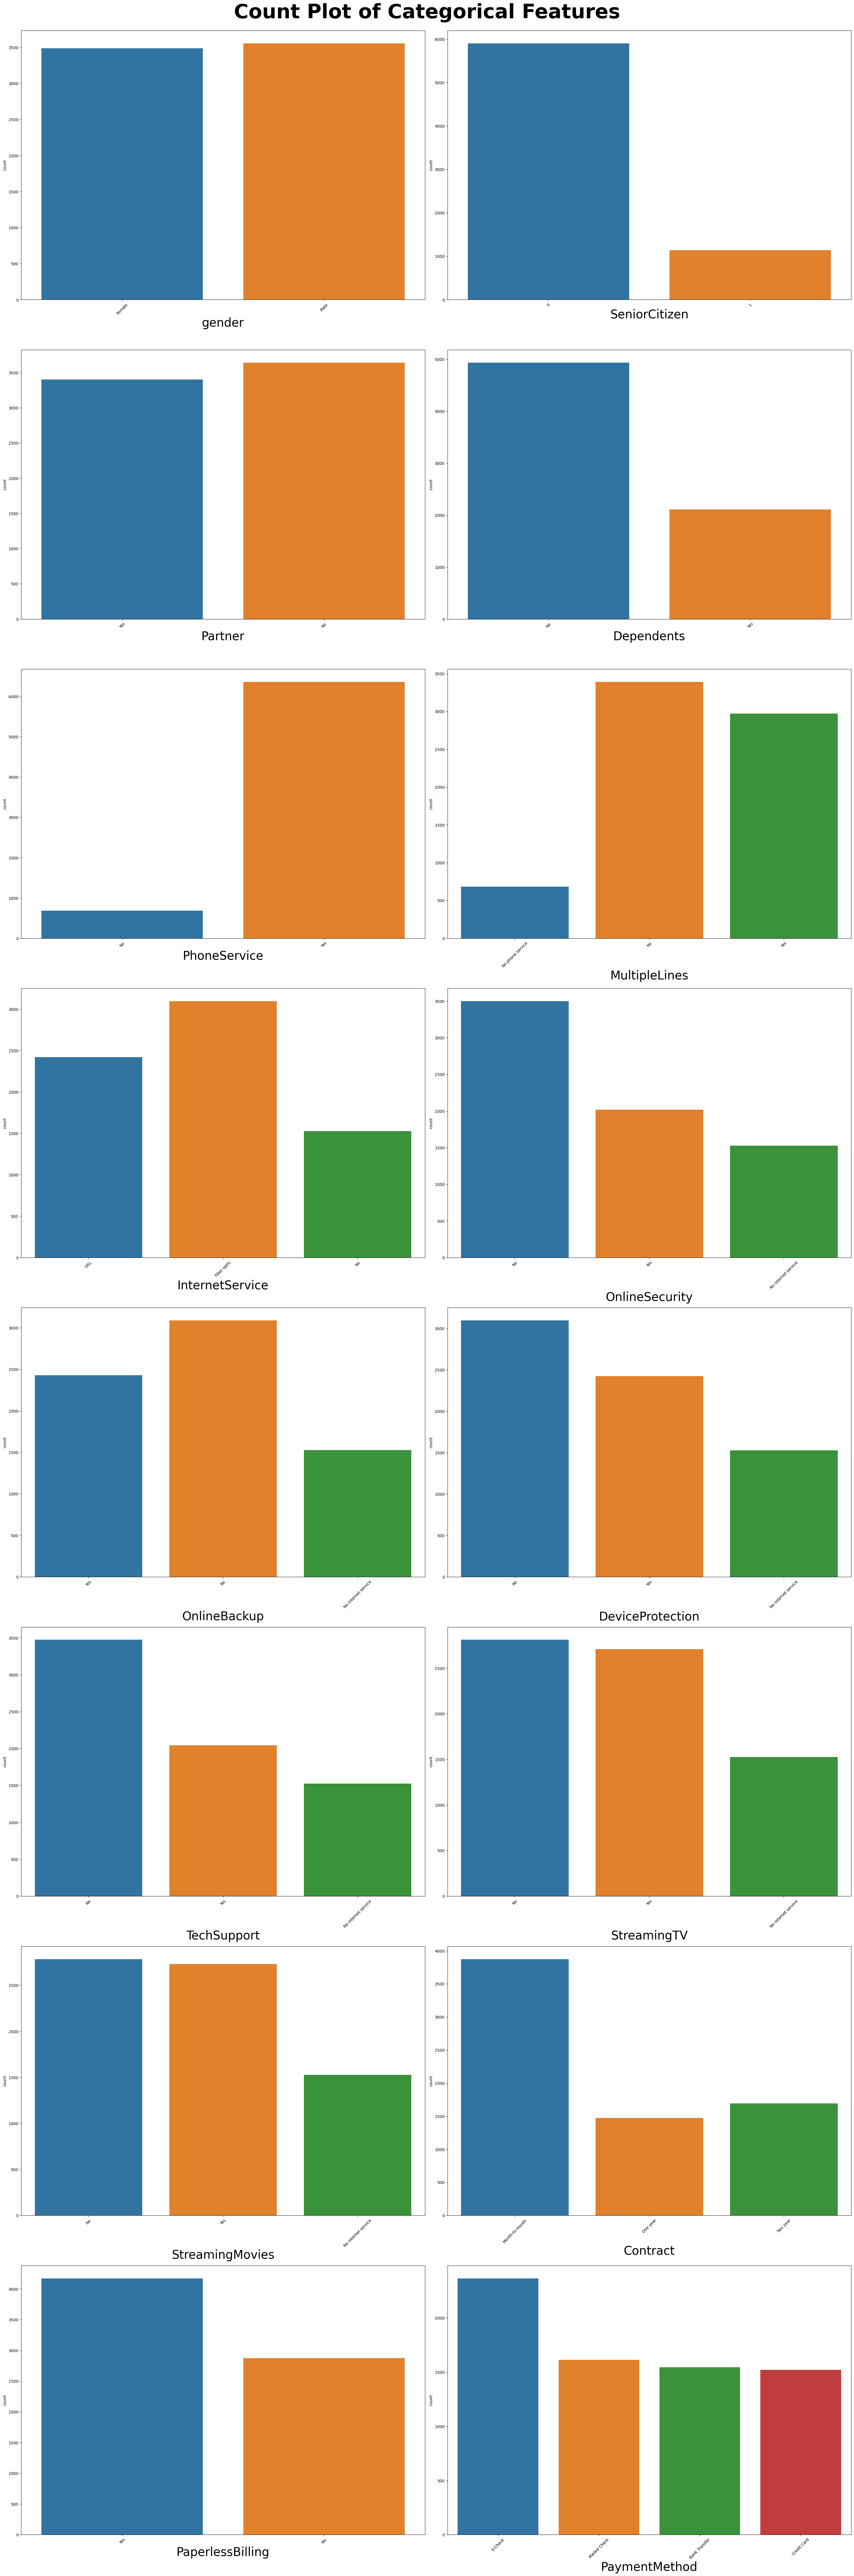

In [17]:
#Univariate Analysis of Categorical Features
plt.figure(figsize=(30, 100))
plt.suptitle('Count Plot of Categorical Features', fontsize=50, fontweight='bold', alpha=1, y=1)

for i in range(0, len(cat)):
    plt.subplot(9, 2, i+1)
    sns.countplot(x=cat[i], data=data)
    plt.xlabel(cat[i],fontsize=30)
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Insights
From the above plots,

1. Senior citizens records is much higher than non-senior records.

2. Churn rate for month-to-month contracts much higher that for other contract durations.

3. Moderately higher churn rate for customers without partners.

4. Much higher records for customers without children.

5. Payment method electronic check shows much higher than other payment methods.

6. Customers with InternetService fiber optic as part of their contract have much higher.



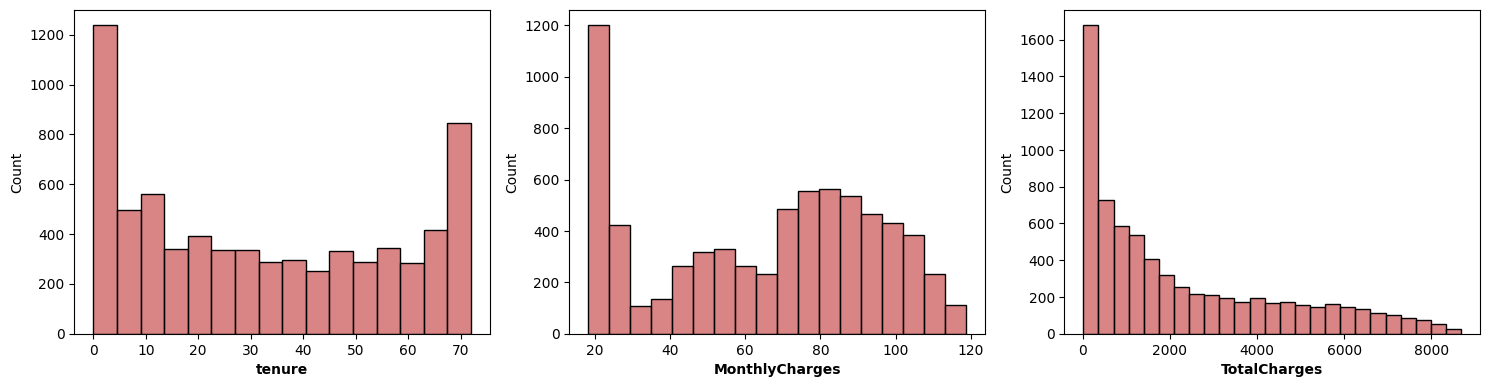

In [18]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(num):
    plt.subplot(4, 3, i+1)
    sns.histplot(x=data[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Insights
1. tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
2. TotalCharges displays a positively or rightly skewed distribution.

## Bivariate Analysis

#### Categorical Features vs Target Variable (Churn):

In [19]:
# We will remove Churn, target variable, from the categorical features list for visualization purposes.
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

### Group 1 : Customer Information :  
#### gender | SeniorCitizen | Partner | Dependents |

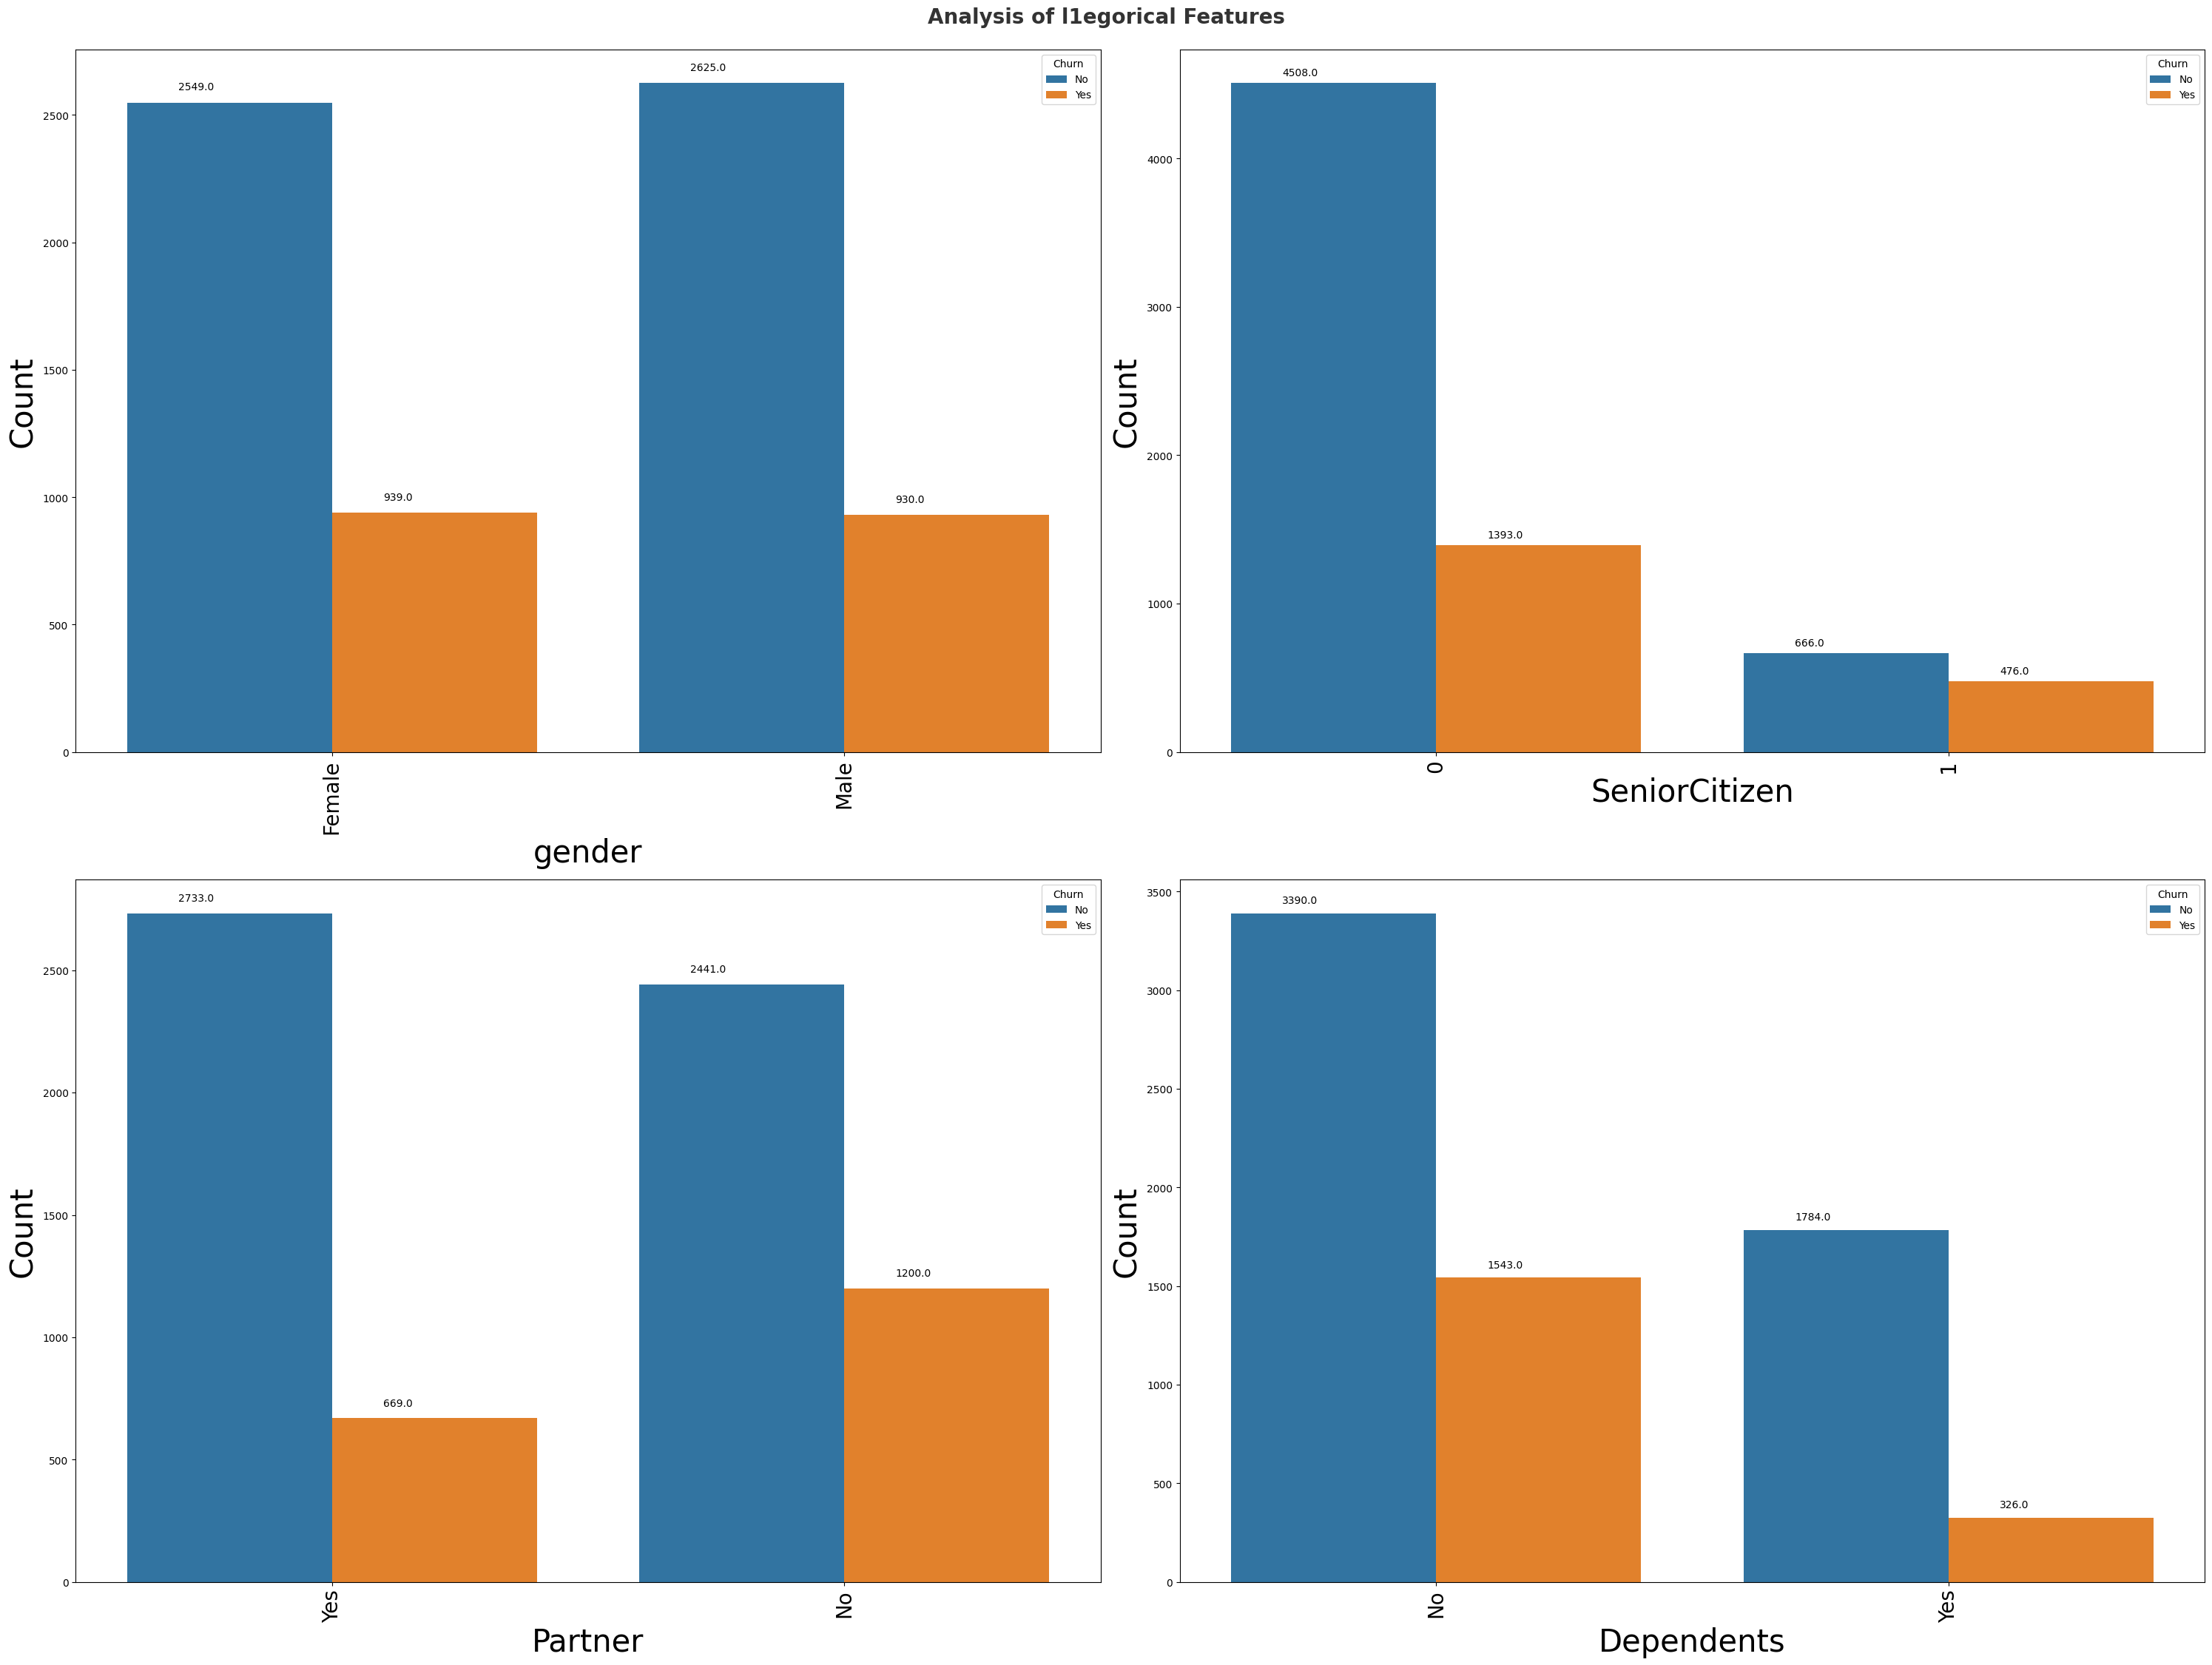

In [20]:
# Bivariate Analysis of Customer Information Features
plt.figure(figsize=(30, 100))
plt.suptitle('Analysis of l1egorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(l1)):
    plt.subplot(9, 2, i+1)
    img=sns.countplot(x=l1[i],data=data,hue='Churn')
    plt.xticks(rotation=90,fontsize=20);
    plt.xlabel(l1[i],fontsize=30)
    plt.ylabel("Count",fontsize=30)
    plt.tight_layout()
    for p in img.patches:
        img.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

1. Customer churning for male & female customers is very similar to each other!
2. Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
3. Customers who are housing with a Partner churned less as compared to those not living with a Partner.
4. Similary, churning is high for the customers that don't have Dependents with them!

### Group 2: Services Subscribed by the Customer :
For visualization purposes, we will create 2 groups      
#### 2.1 PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [21]:
# we break Services Signed Up in 2 parts for visualization purpose
l2_1 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies']


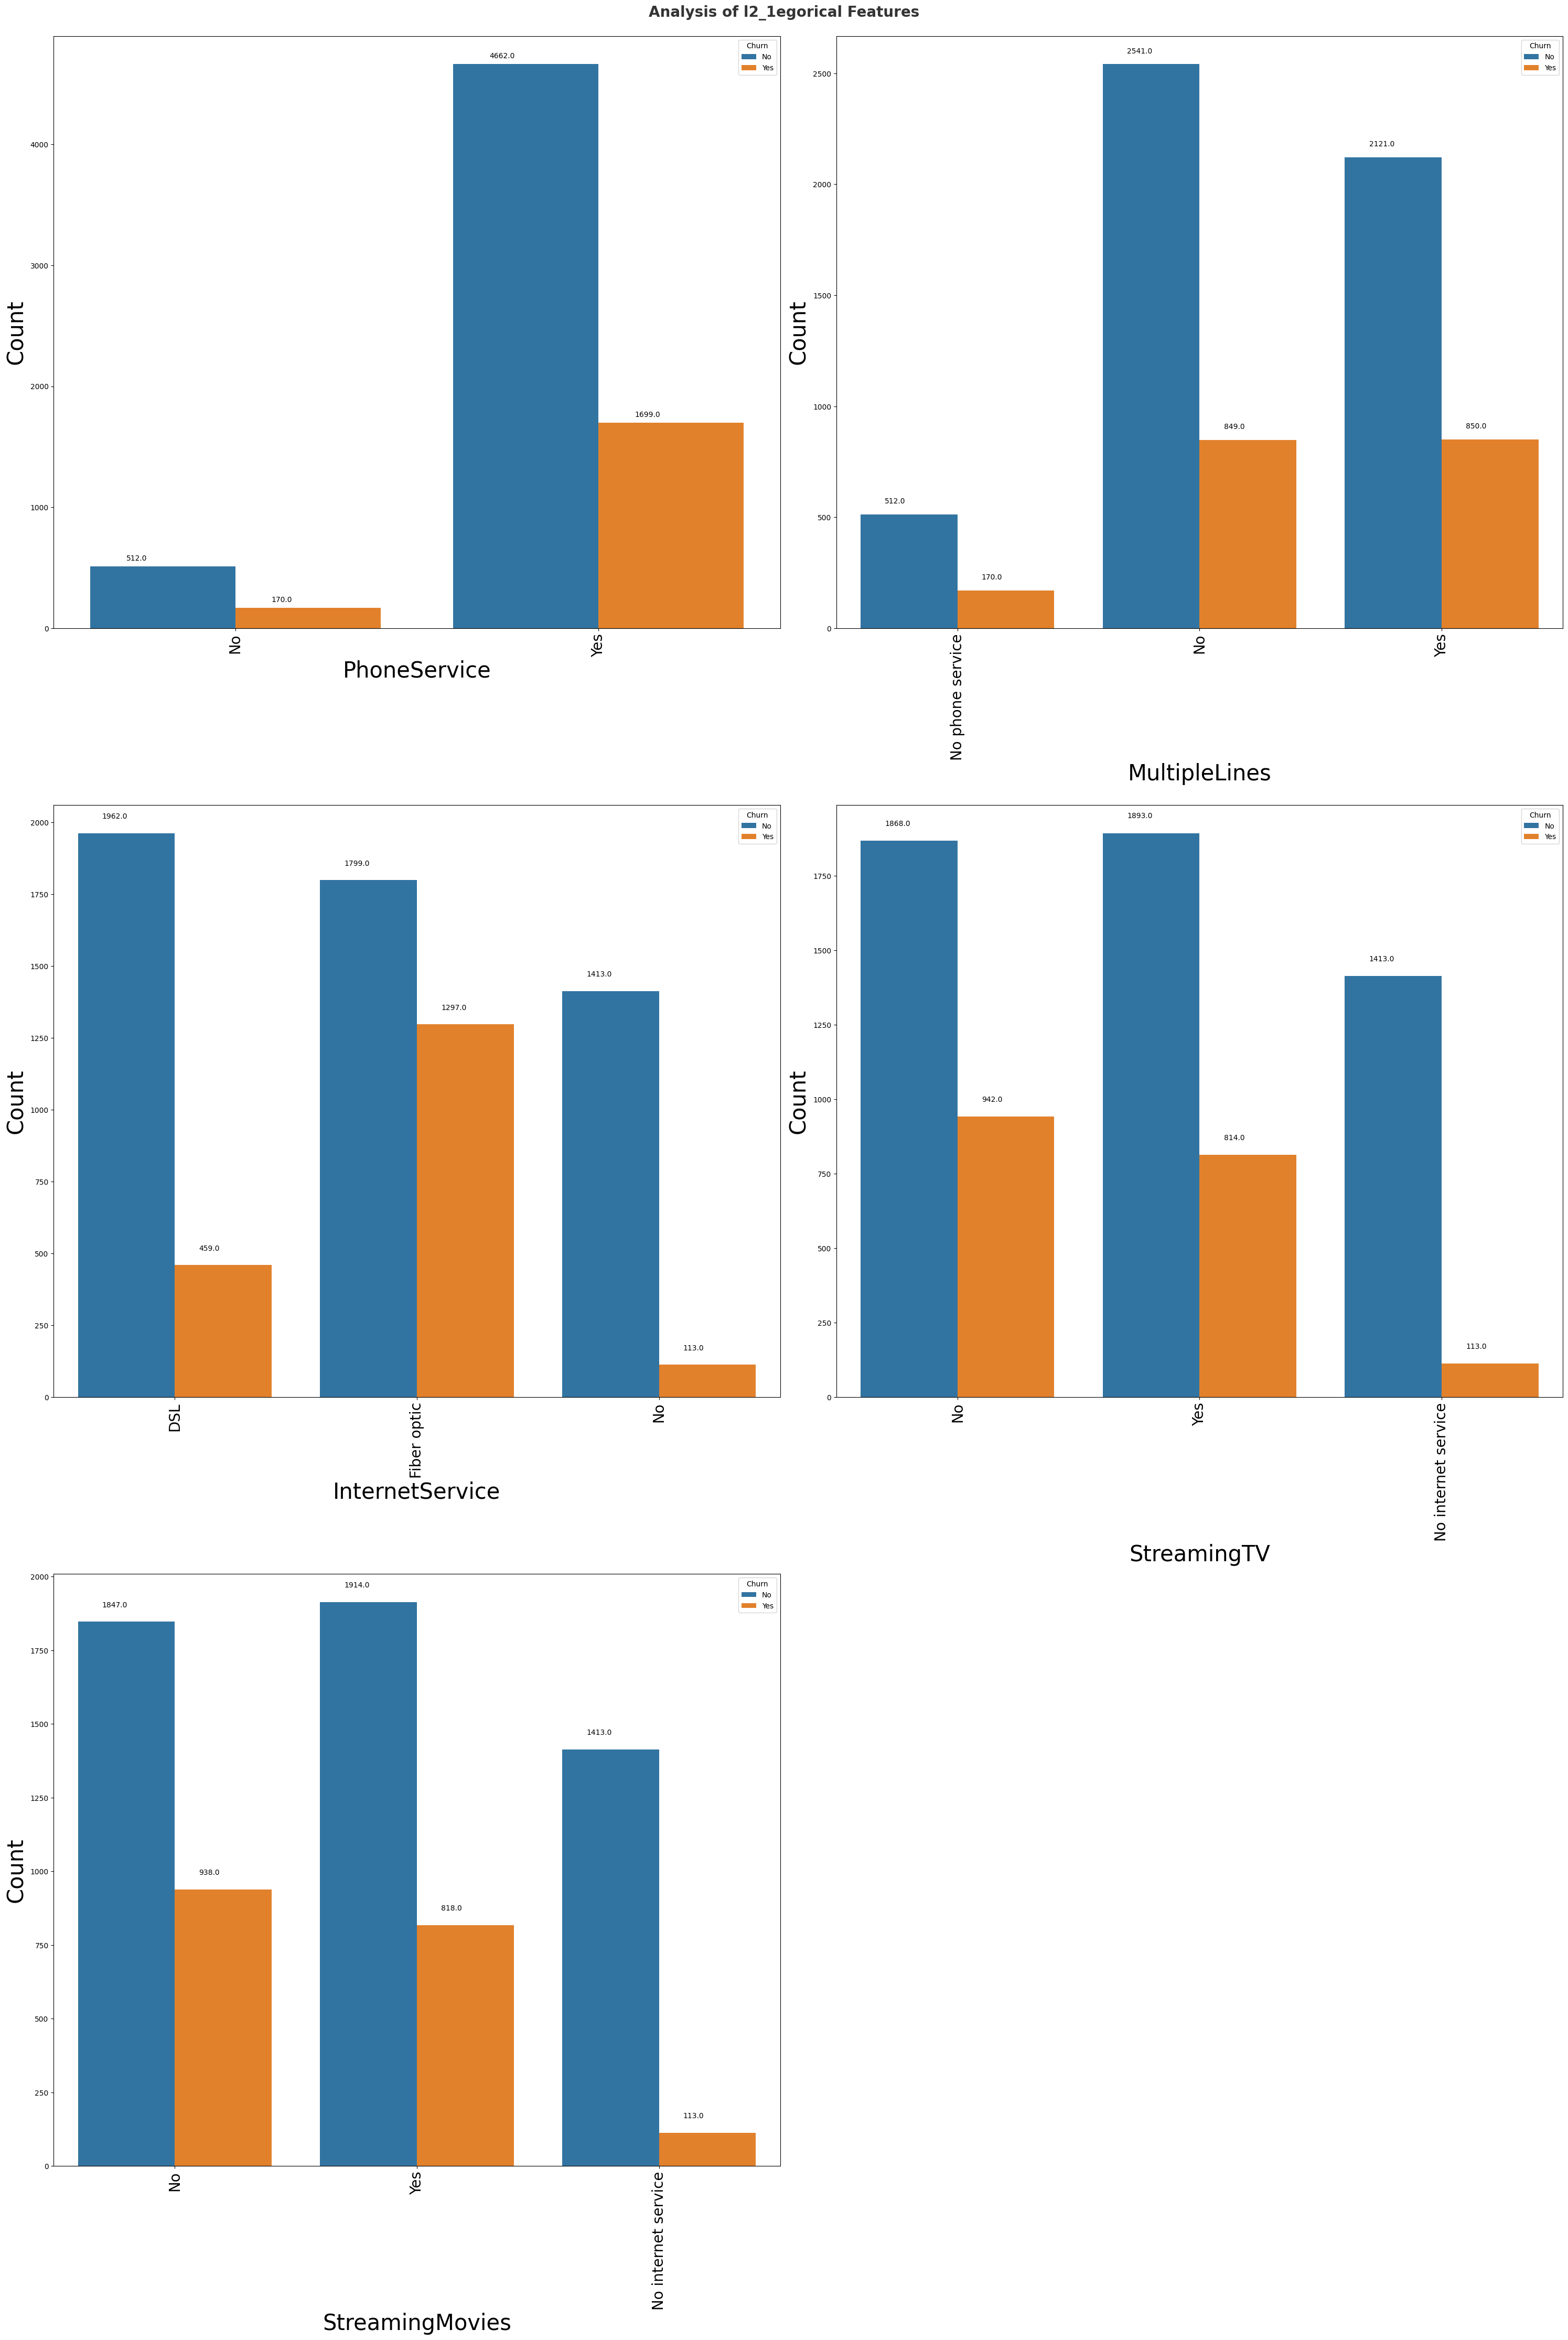

In [22]:
# Bivariate Analysis of Customer Information Features
plt.figure(figsize=(30, 100))
plt.suptitle('Analysis of l2_1egorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(l2_1)):
    plt.subplot(7, 2, i+1)
    img=sns.countplot(x=l2_1[i],data=data,hue='Churn')
    plt.xticks(rotation=90,fontsize=20);
    plt.xlabel(l2_1[i],fontsize=30)
    plt.ylabel("Count",fontsize=30)
    plt.tight_layout()
    for p in img.patches:
        img.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

1. Customer churning for male & female customers is very similar to each other!
2. Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
3. Customers who are housing with a Partner churned less as compared to those not living with a Partner.
Similary, churning is high for the customers that don't have Dependents with them!

### Group 2: Services Subscribed by the Customer :
#### 2.2 OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

In [23]:
l2_2 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']

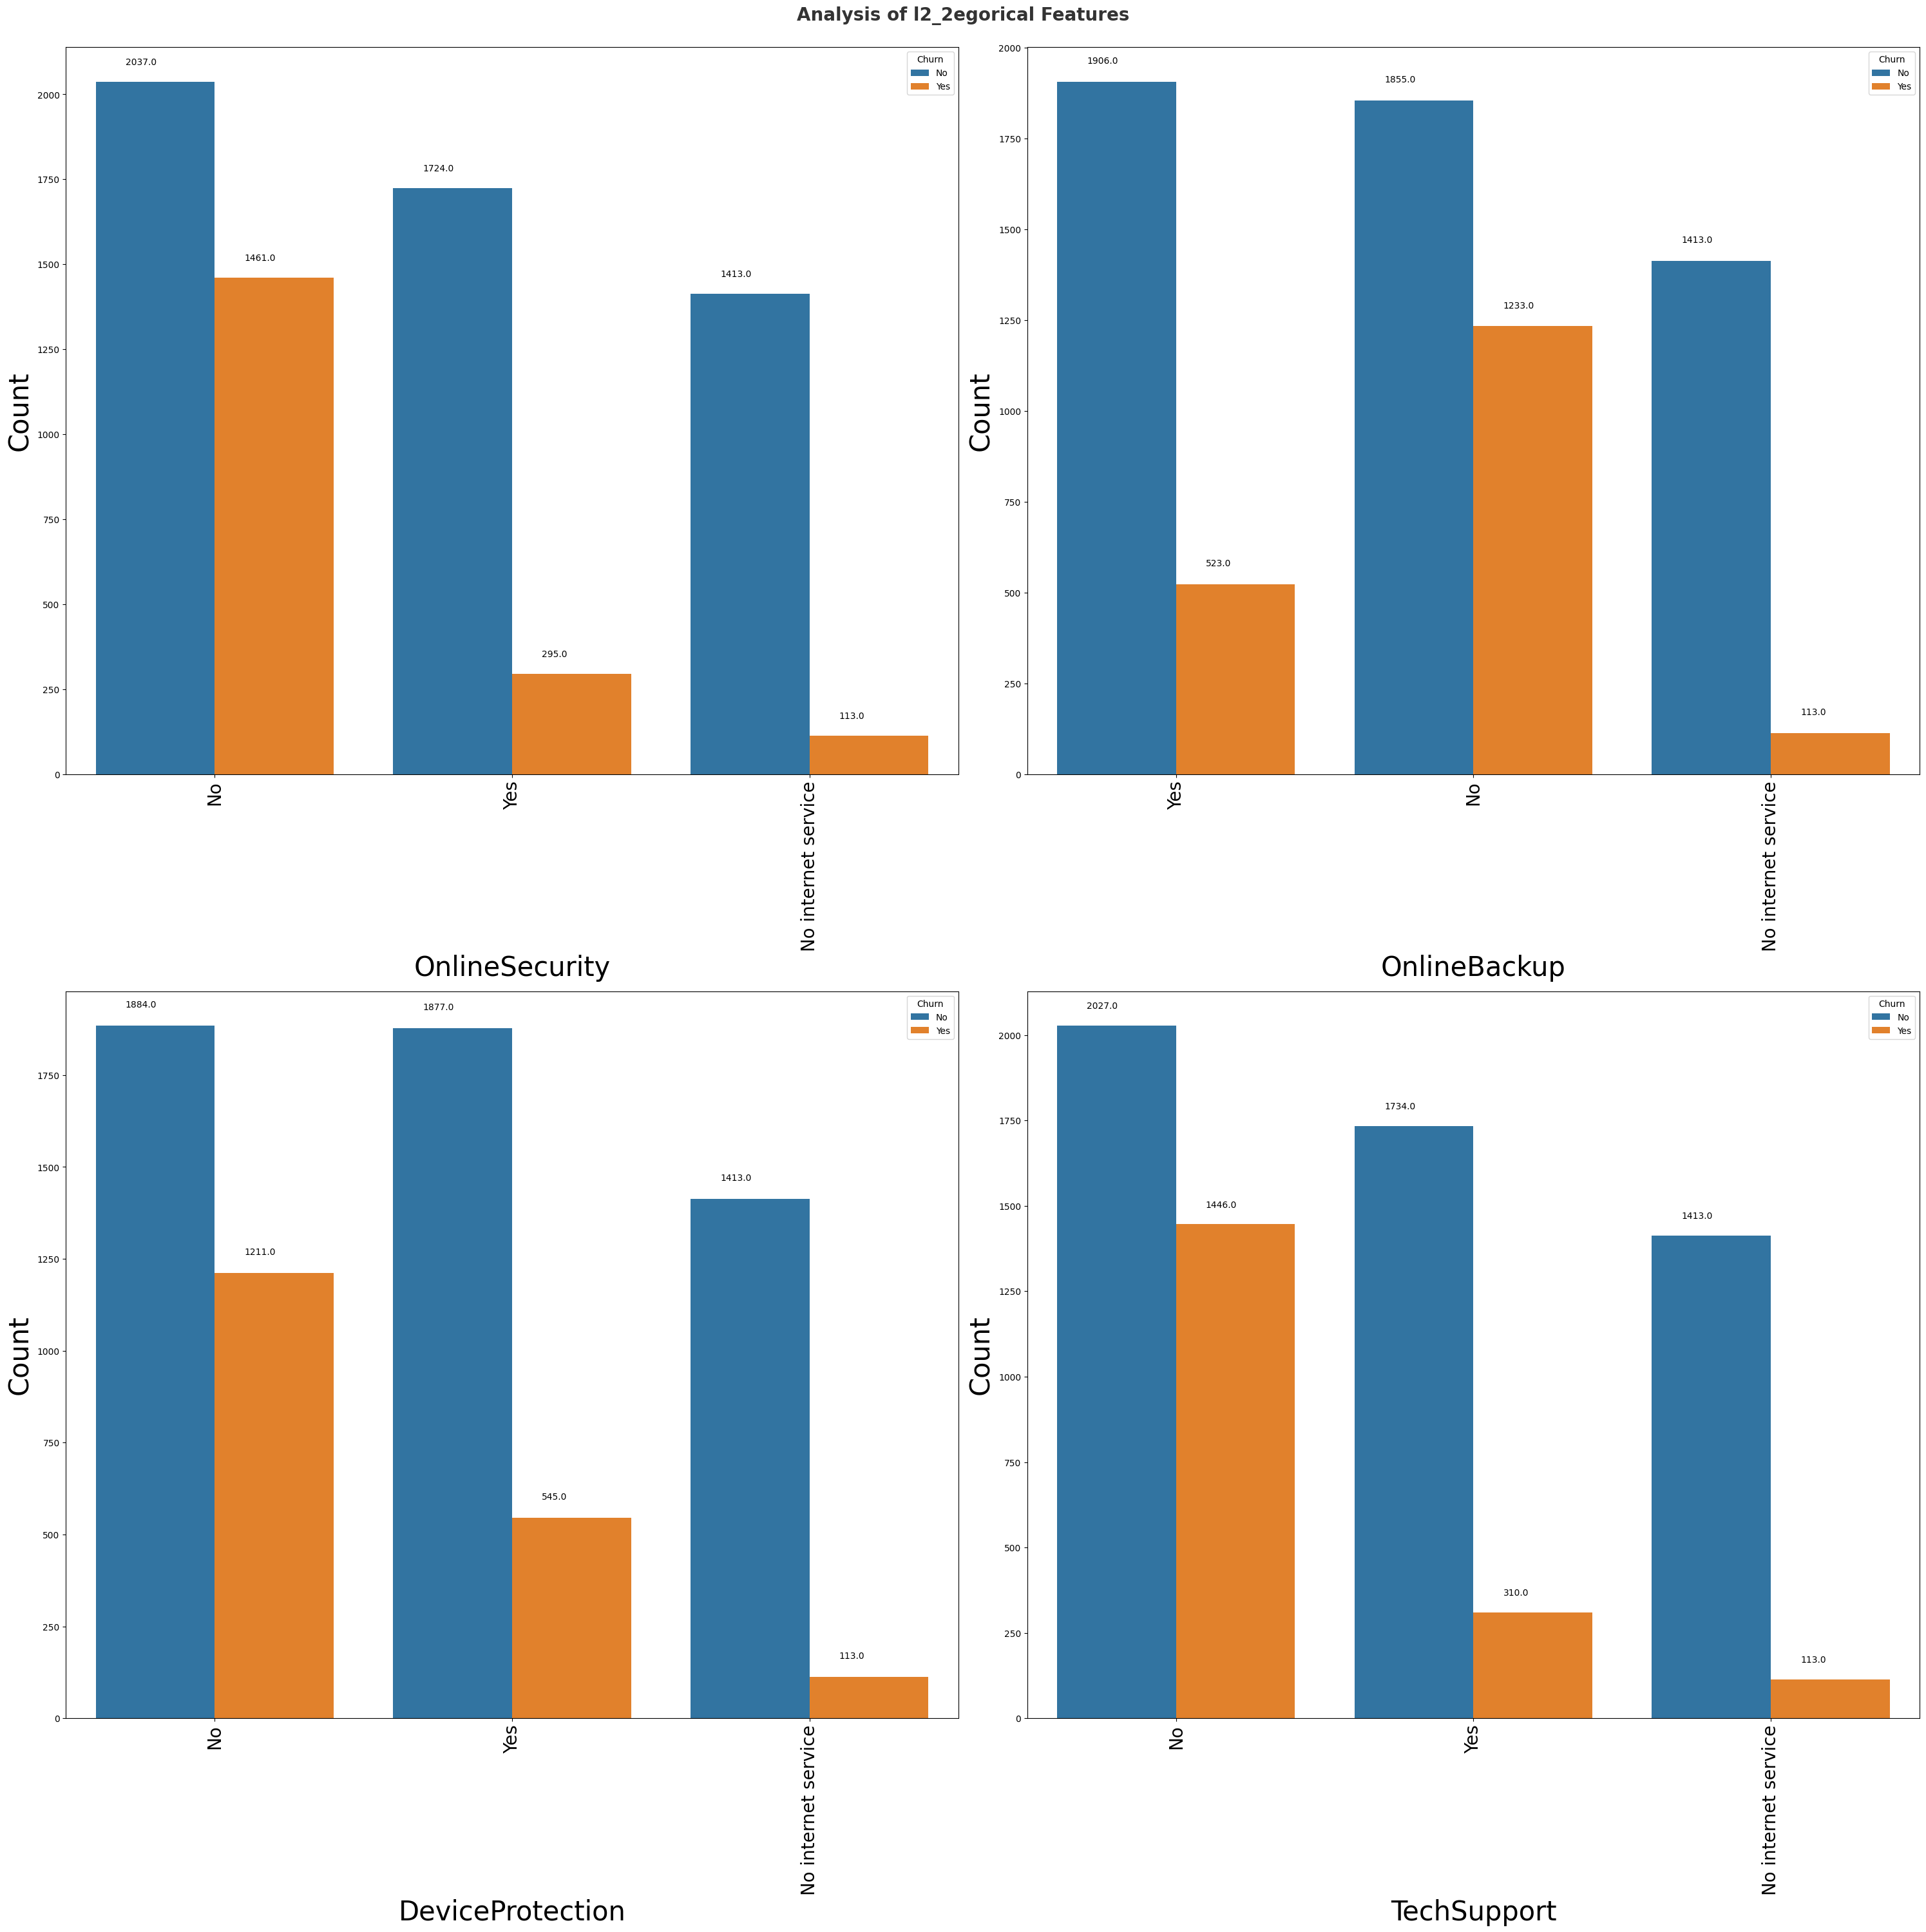

In [24]:
# Bivariate Analysis of Customer Information Features
plt.figure(figsize=(30, 100))
plt.suptitle('Analysis of l2_2egorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(l2_2)):
    plt.subplot(7, 2, i+1)
    img=sns.countplot(x=l2_2[i],data=data,hue='Churn')
    plt.xticks(rotation=90,fontsize=20);
    plt.xlabel(l2_2[i],fontsize=30)
    plt.ylabel("Count",fontsize=30)
    plt.tight_layout()
    for p in img.patches:
        img.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.

In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.

A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!

StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!


1. When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!
2. A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

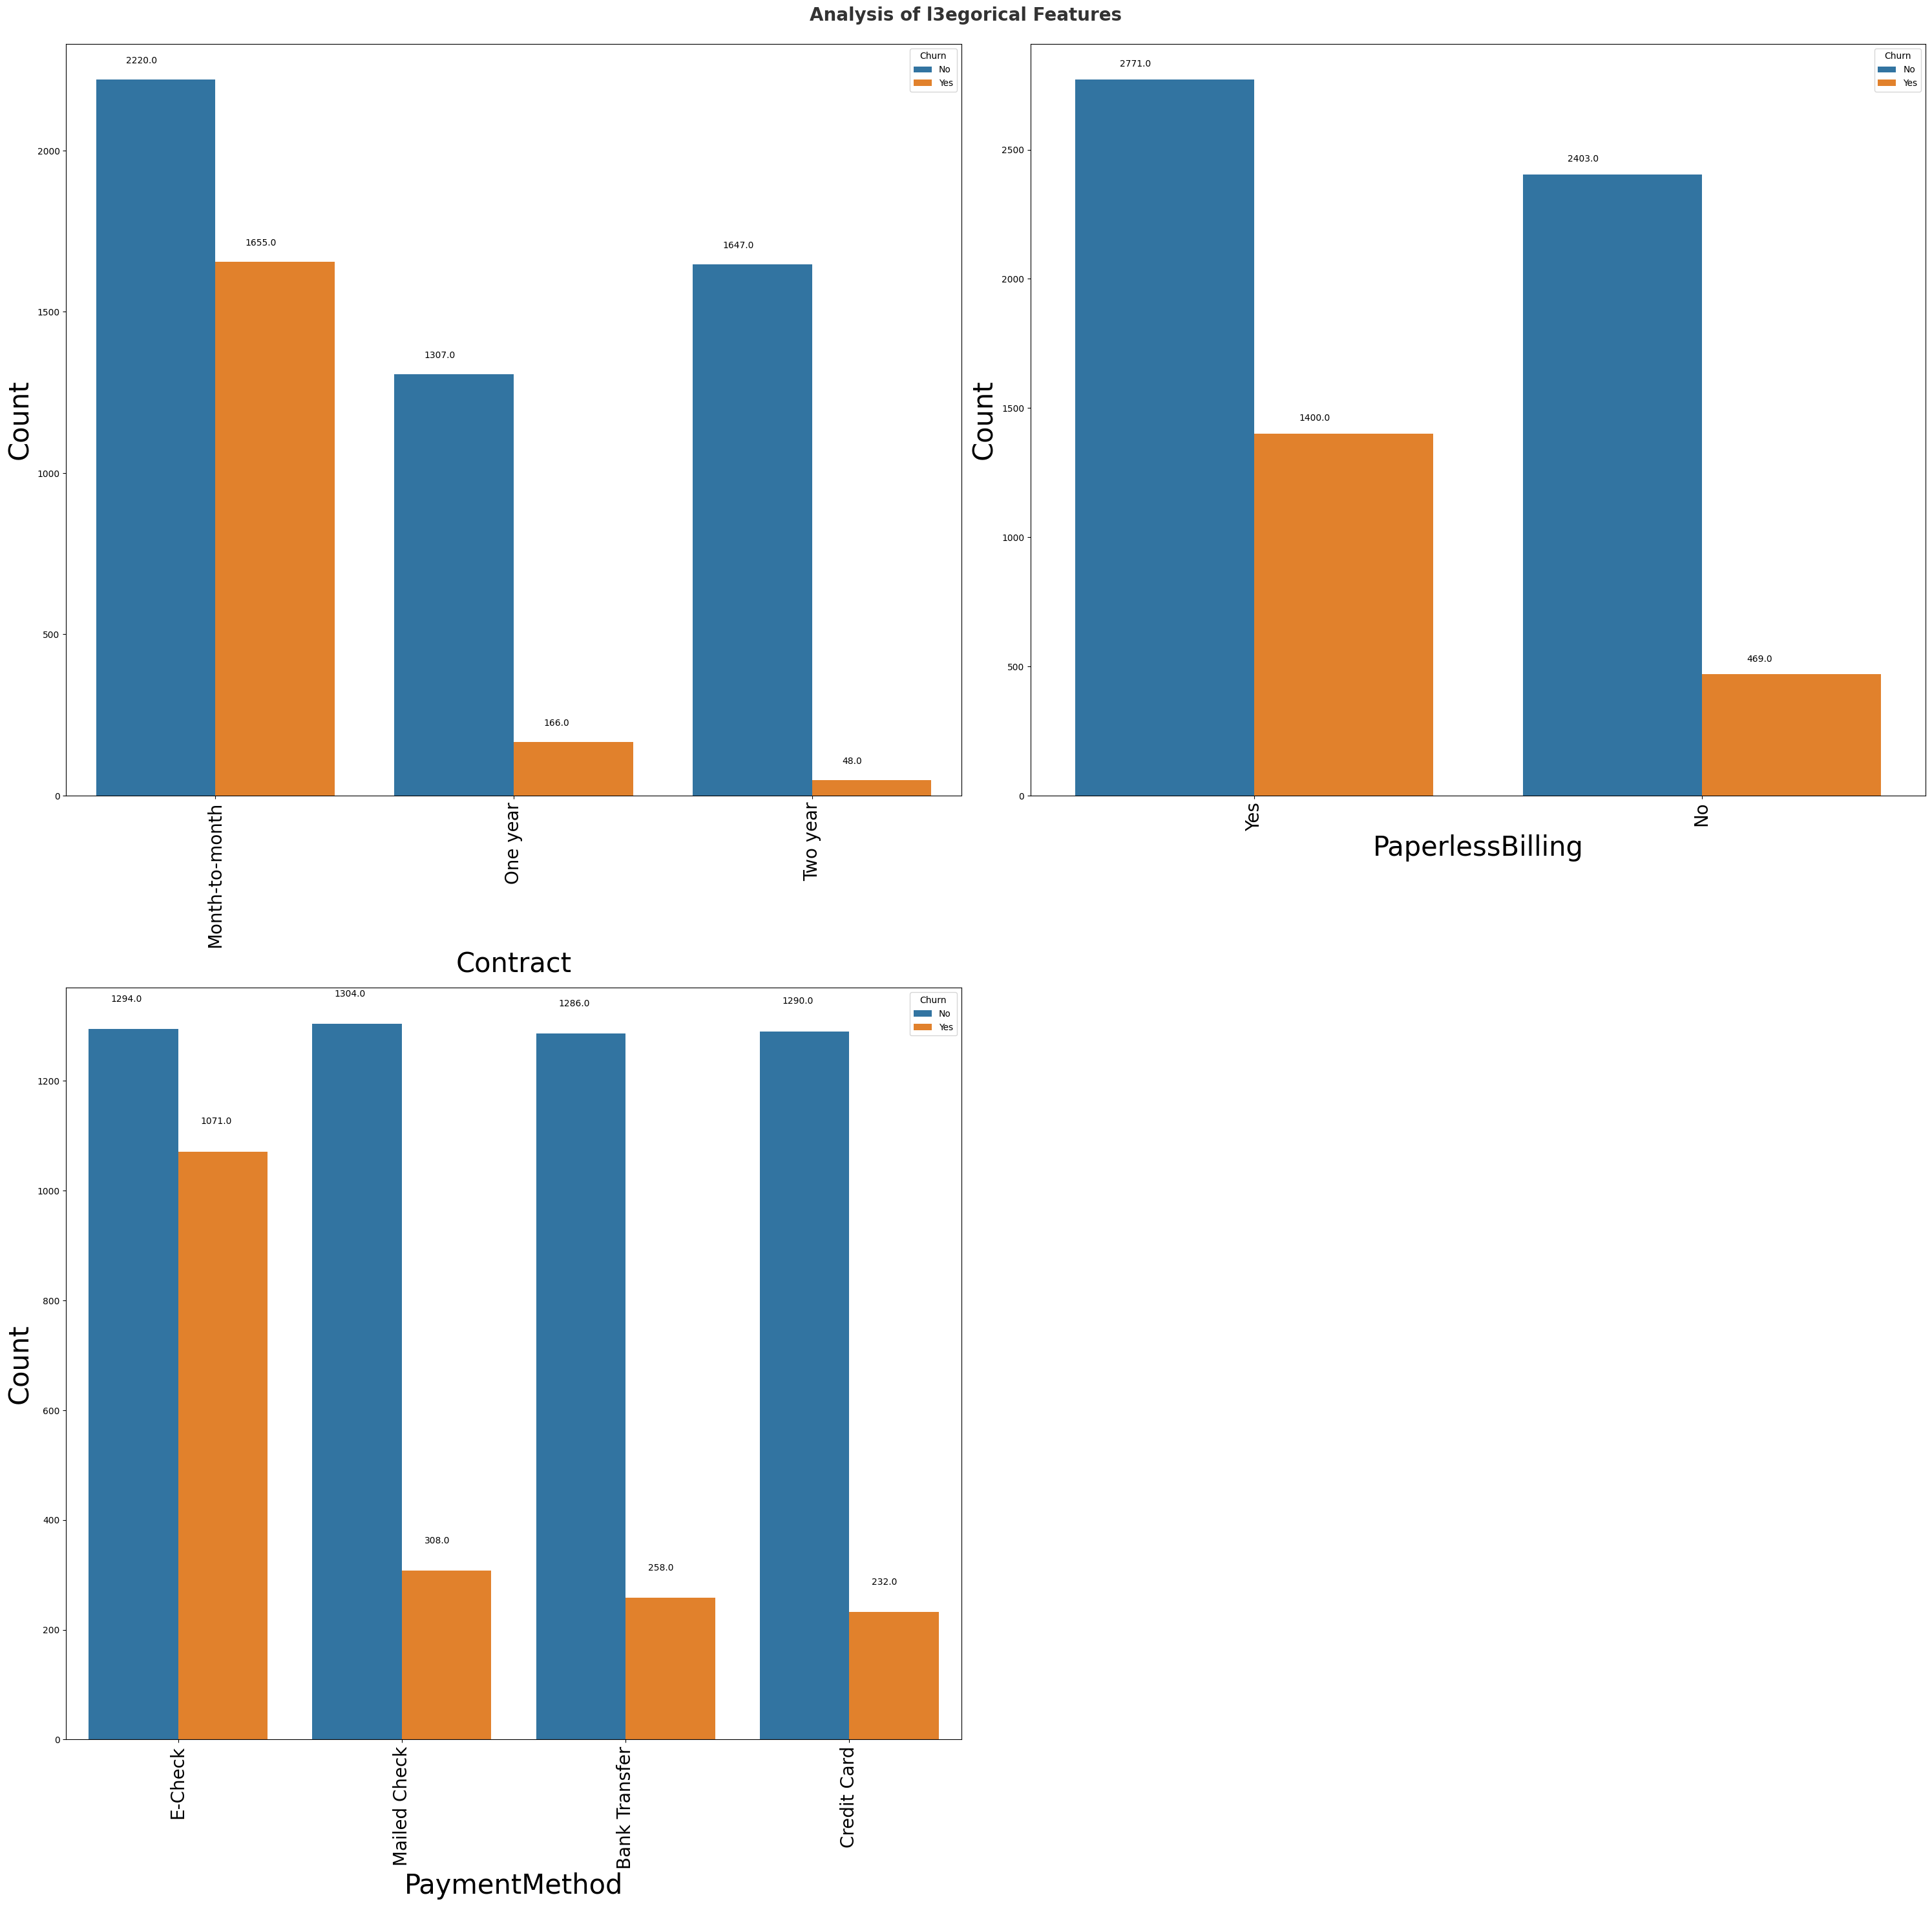

In [25]:
# Bivariate Analysis of Customer Information Features
plt.figure(figsize=(30, 100))
plt.suptitle('Analysis of l3egorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(l3)):
    plt.subplot(7, 2, i+1)
    img=sns.countplot(x=l3[i],data=data,hue='Churn')
    plt.xticks(rotation=90,fontsize=20);
    plt.xlabel(l3[i],fontsize=30)
    plt.ylabel("Count",fontsize=30)
    plt.tight_layout()
    for p in img.patches:
        img.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

1. Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
2. Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!
3. PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
4. Customers clearly resented the Electronic check PaymentMethod. Out of the 2365 number of bills paid using Electronic check, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

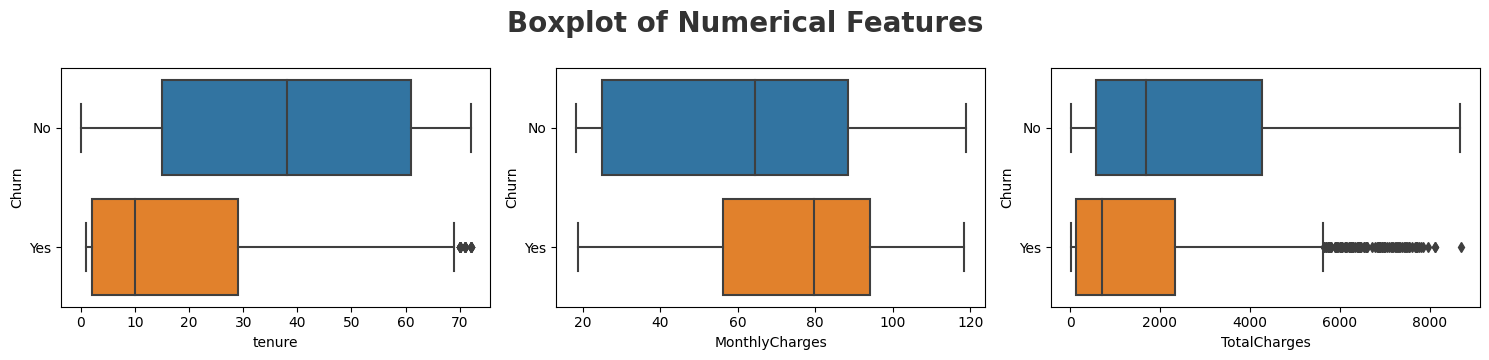

In [26]:

plt.figure(figsize=(15, 15))
plt.suptitle('Boxplot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[num[i]], y = data["Churn"])
    plt.xlabel(num[i])
    plt.tight_layout()

#### Insights
From the above plots,

- Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months.

- Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).

- TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

In [27]:
# plt.figure(figsize=(15, 20))
# plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1, y=1)
# j1 = len(cat)
# for i in range(0, len(num)):
#     plt.subplot(4, 3, i+1)
#     sns.kdeplot(x=num[i], color='b',data=data,hue='Churn')
#     plt.xlabel(num[i])
#     plt.tight_layout()

In [28]:
# sns.pairplot(data, hue = "Churn")

# Step4: Feature Engineering

In [29]:
# Drop customerID feature 
data = data.drop(columns='customerID')

# convert the dependent variable to binary variable.
data["Churn"] = data["Churn"].map({'No': 0, 'Yes': 1})

In [30]:
# Creating new feature NumberAdditionalServices

data['Number_AdditionalServices'] = (data[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies',
                                           'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)


In [31]:
### Analyzing discrete, continuous (numerical) and catagorical data:

categorical_features = data[[i for i in data.columns if data[i].dtype == 'O']]
numeric_features = data[[i for i in data.columns if data[i].dtype != 'O']]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features.columns), numeric_features.columns))
print('\nWe have {} categorical features : {}'.format(len(categorical_features.columns), categorical_features.columns))

We have 5 numerical features : Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Number_AdditionalServices'],
      dtype='object')

We have 16 categorical features : Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [32]:
# Checking for outliers in numerical features

data_num = data[numeric_features.columns]
data_num.describe()

Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
((data_num < (Q1 - 1.5 * IQR)) | (data_num > (Q3 + 1.5 * IQR))).any()


tenure                       False
MonthlyCharges               False
TotalCharges                 False
Churn                        False
Number_AdditionalServices    False
dtype: bool

In [33]:
# The unique values for every feature are printed to the console to get a deeper understanding about the feature values.
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is gender and number of categories are 2
The feature is SeniorCitizen and number of categories are 2
The feature is Partner and number of categories are 2
The feature is Dependents and number of categories are 2
The feature is PhoneService and number of categories are 2
The feature is MultipleLines and number of categories are 3
The feature is InternetService and number of categories are 3
The feature is OnlineSecurity and number of categories are 3
The feature is OnlineBackup and number of categories are 3
The feature is DeviceProtection and number of categories are 3
The feature is TechSupport and number of categories are 3
The feature is StreamingTV and number of categories are 3
The feature is StreamingMovies and number of categories are 3
The feature is Contract and number of categories are 3
The feature is PaperlessBilling and number of categories are 2
The feature is PaymentMethod and number of categories are 4


In [34]:
# data.head(20)

# Convert Non-Numeric to Numeric Using label encoders

## Categorical Encoding



In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data[data.select_dtypes(include=['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [36]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,1
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,2
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0


## one -hot Encoding 

In [37]:
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

data = pd.get_dummies(data, columns=features_ohe)

### Scaling (Min-Max)



In [38]:
# Min-Max-Scaling for identified columns
from sklearn.preprocessing import MinMaxScaler

# Standardize for numeric variables.
features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_features_mms = pd.DataFrame(data, columns=features_mms)
data_remaining_features = data.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(data_features_mms)

data_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=data_remaining_features.index)

data = pd.concat([data_remaining_features, data_rescaled_features], axis=1)


## Correlation Analysis

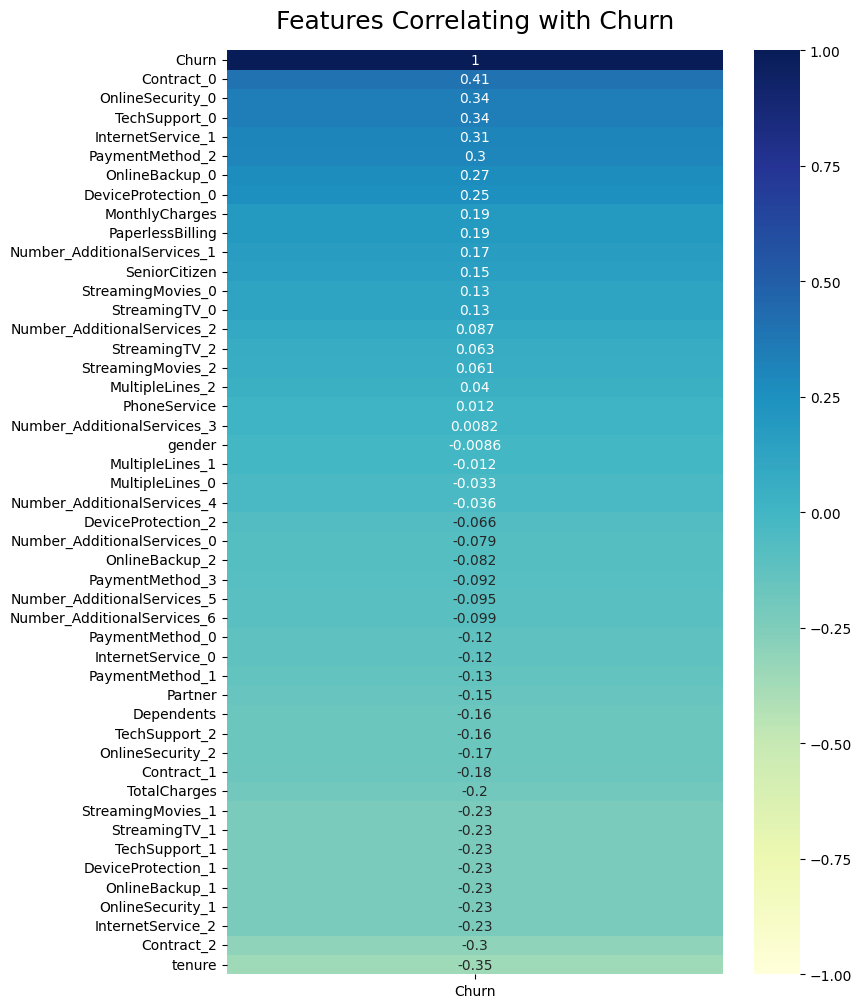

In [39]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1,
                      vmax=1, annot=True, cmap='YlGnBu')

heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:>

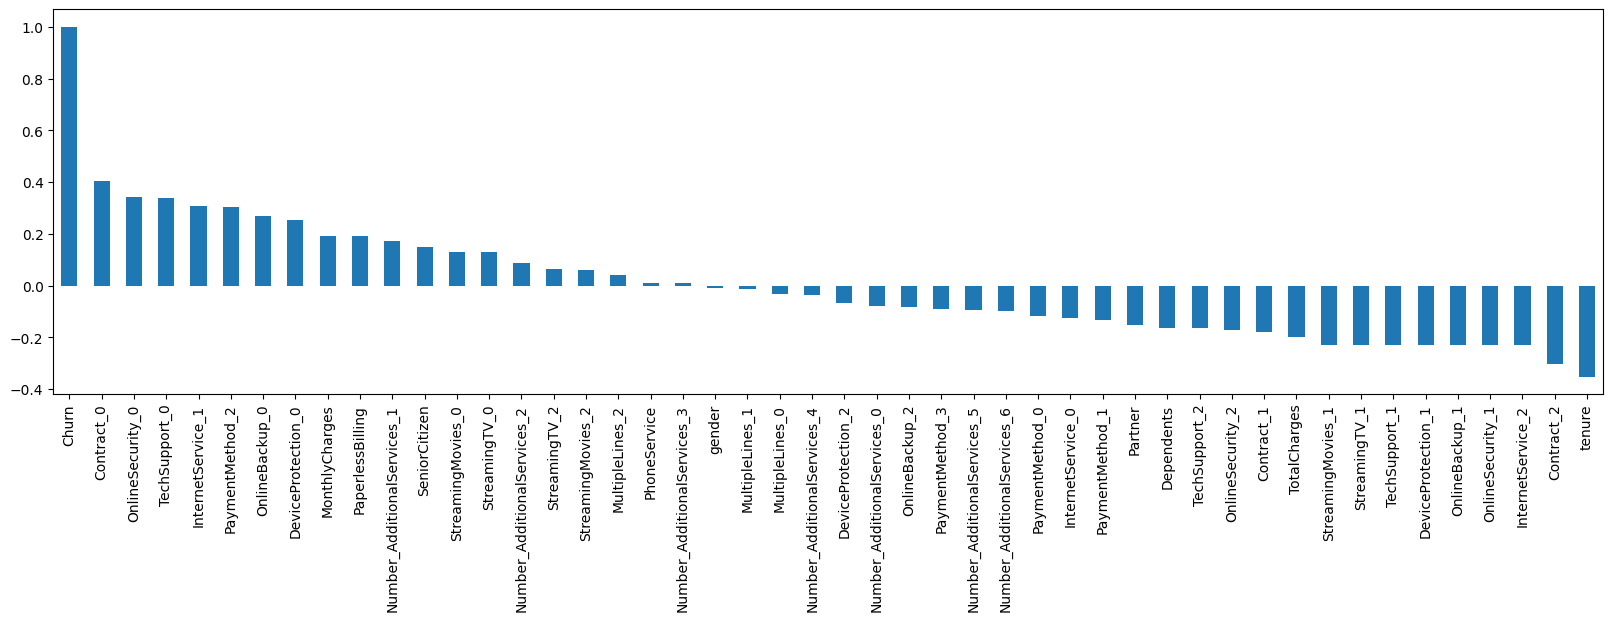

In [40]:
# Showing the correlation plot for correlation of churn with each of the remaining features
plt.figure(figsize=(16,10))
corr = data.corr()['Churn']  #
corr.sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

# Step5: Train-Test Split

For the performance of model training and testing steps, the data set is split into 80% training data and 20% test data. The “Churn” column is defined as the class (the “y”), the remaining columns as the features (the “X”).



In [41]:
from sklearn.model_selection import train_test_split

x1 = data.drop('Churn', axis=1)
x = x1.values
y = data['Churn'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
print(x_train.shape)
print(x_test.shape)
print('\n***********************************************')
print(y_train.shape)
print(y_test.shape)

(5634, 47)
(1409, 47)

***********************************************
(5634,)
(1409,)


# Step6: Model Selection, Training, Prediction

In [43]:
# feature importance / significant using DT 
# feature importance ( there are many x variables)

# ref: https://vitalflux.com/feature-importance-random-forest-classifier-python/
# # https://builtin.com/data-science/evaluating-classification-models

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= "entropy",max_depth= 5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
#Calculating feature importances
importances = dt.feature_importances_

# Sort feature importances in descending order
feature_imp = pd.DataFrame({"Features": x1.columns ,
                            "Importance": dt.feature_importances_})


feature_imp = feature_imp.sort_values('Importance', ascending=False)
feature_imp

,Features,Importance
30,Contract_0,0.520282
44,tenure,0.158559
10,InternetService_1,0.104021
45,MonthlyCharges,0.064345
46,TotalCharges,0.038855
32,Contract_2,0.031118
12,OnlineSecurity_0,0.023215
35,PaymentMethod_2,0.014932
29,StreamingMovies_2,0.014731
4,PhoneService,0.014590


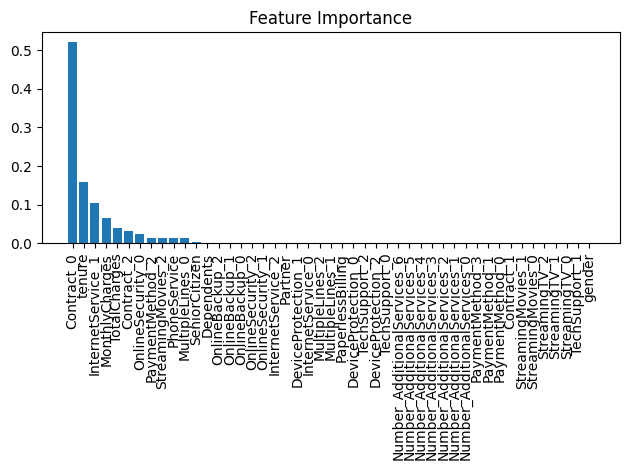

In [46]:
# Plot the feature importance


#Calculating feature importances
importances = dt.feature_importances_


# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Creating plot
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), x1.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
# print(x1.columns[indices])

In [47]:
dt.feature_importances_.sum()

1.0000000000000002

In [48]:
y_pred_dt = dt.predict(x_test)


from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_dt = confusion_matrix(y_test, y_pred_dt)

val_dt = np.mat(conmat_dt) 

classnames_dt = list(set(y_train))

df_cm_dt= pd.DataFrame(val_dt, index=classnames_dt, columns=classnames_dt, )

print(df_cm_dt)
# print(conmat) 
# classnames


     0    1
0  897  139
1  144  229


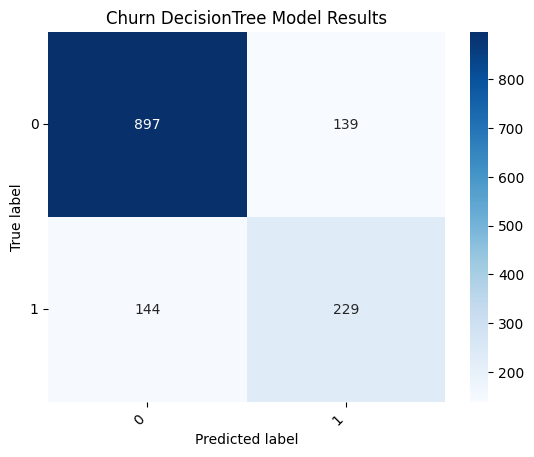

In [49]:

import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_dt, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn DecisionTree Model Results')

plt.show()    



In [50]:


# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy of the Decision Tree: ", accuracy_score(y_test, y_pred_dt) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Decision Tree classifier is: {precision_score(y_test, y_pred_dt) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Decision Tree classifier is: {recall_score(y_test, y_pred_dt) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Decision Tree classifier is: {f1_score(y_test, y_pred_dt) * 100}")



Accuracy of the Decision Tree:  79.91483321504613
Precision Score of the Decision Tree classifier is: 62.22826086956522
Recall Score of the Decision Tree classifier is: 61.3941018766756
F1 Score of the Decision Tree classifier is: 61.80836707152497


In [51]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_dt_proba = dt.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)

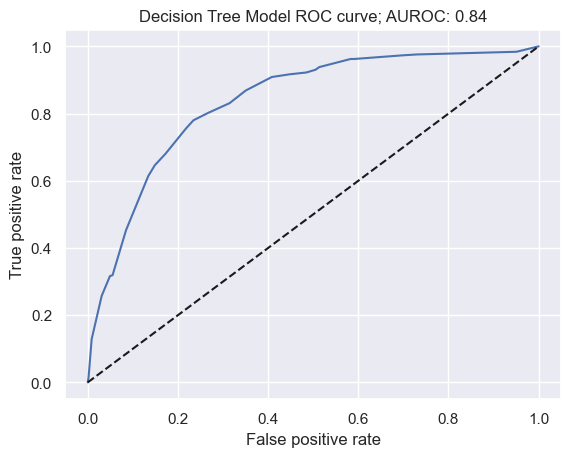

In [52]:
# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_dt_proba), 2)

plt.title(f'Decision Tree Model ROC curve; AUROC: {AUROC}');

plt.show()

In [53]:
# from six import StringIO
# from IPython.display import Image 
# from sklearn.tree import export_graphviz
# import pydotplus
# import pydot


In [54]:
# dot_data = StringIO()

In [55]:
# export_graphviz(dt, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True , feature_names= x1.columns  )
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())


In [56]:
# pip install six

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = lr_model.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8147622427253371


In [60]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_lr = confusion_matrix(y_test, y_pred)

val_lr = np.mat(conmat_lr) 

classnames_lr = list(set(y_train))

df_cm_lr = pd.DataFrame(val_lr, index=classnames_lr, columns=classnames_lr, )

print(df_cm_lr)
# print(conmat) 
# classnames

     0    1
0  931  105
1  156  217


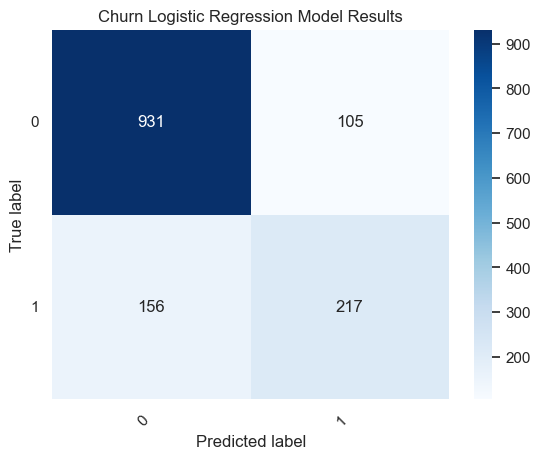

In [61]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_lr, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn Logistic Regression Model Results')

plt.show()    

In [62]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = lr_model.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



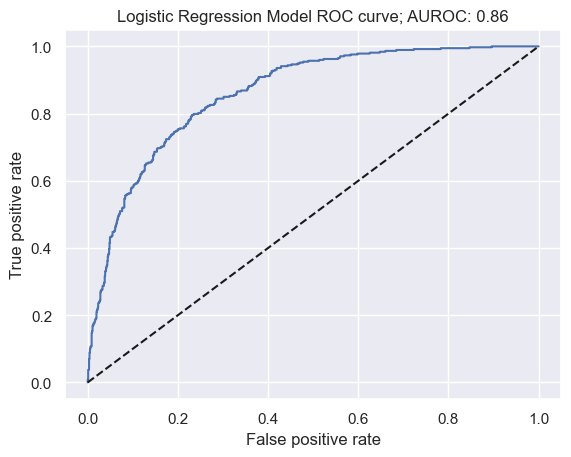

In [63]:
# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

In [64]:
y_pred_lr = lr_model.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred_lr) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Logistic Regression classifier is: {precision_score(y_test, y_pred_lr) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Logistic Regression classifier is: {recall_score(y_test, y_pred_lr) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Logistic Regression classifier is: {f1_score(y_test, y_pred_lr) * 100}")

Accuracy:  81.47622427253371
Precision Score of the Logistic Regression classifier is: 67.3913043478261
Recall Score of the Logistic Regression classifier is: 58.17694369973191
F1 Score of the Logistic Regression classifier is: 62.44604316546762


## Suppoert Vector Machine

In [65]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(x_train,y_train)

SVC(probability=True)

In [66]:
y_pred_svm = svm.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_svm = confusion_matrix(y_test, y_pred_svm)

val_svm = np.mat(conmat_svm) 

classnames_svm = list(set(y_train))

df_cm_svm = pd.DataFrame(val_svm, index=classnames_svm, columns=classnames_svm,)

print(df_cm_svm)
# print(conmat) 
# classnames

     0    1
0  947   89
1  173  200


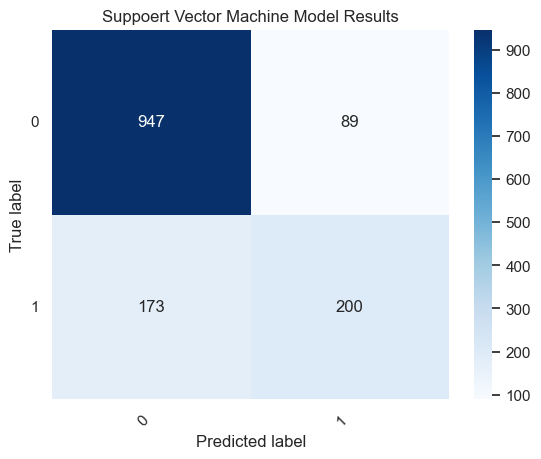

In [68]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_svm, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Suppoert Vector Machine Model Results')

plt.show()    

In [69]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = svm.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

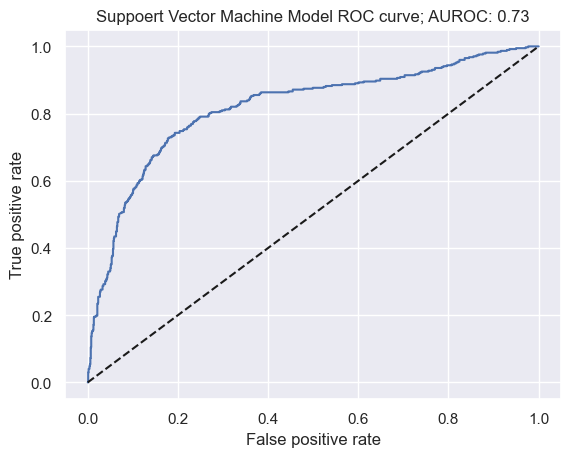

In [70]:
# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_svm), 2)

plt.title(f'Suppoert Vector Machine Model ROC curve; AUROC: {AUROC}');

plt.show()


In [71]:
y_pred_svm = svm.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy of Suppoert Vector Machine: ", accuracy_score(y_test, y_pred_svm) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Suppoert Vector Machine is: {precision_score(y_test, y_pred_svm) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Suppoert Vector Machine is: {recall_score(y_test, y_pred_svm) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Suppoert Vector Machine is: {f1_score(y_test, y_pred_svm) * 100}")

Accuracy of Suppoert Vector Machine:  81.40525195173882
Precision Score of the Suppoert Vector Machine is: 69.20415224913495
Recall Score of the Suppoert Vector Machine is: 53.61930294906166
F1 Score of the Suppoert Vector Machine is: 60.42296072507553


## k-nearest neighbors 

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train, y_train)



KNeighborsClassifier()

In [73]:
y_pred_knn = knn.predict(x_test)
y_pred_knn_prob = knn.predict_proba(x_test)

In [74]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_knn = confusion_matrix(y_test, y_pred_knn)

val_knn = np.mat(conmat_knn) 

classnames_knn = list(set(y_train))

df_cm_knn = pd.DataFrame(val_knn, index=classnames_knn, columns=classnames_knn,)

print(df_cm_knn)
# print(conmat) 
# classnames

     0    1
0  884  152
1  186  187


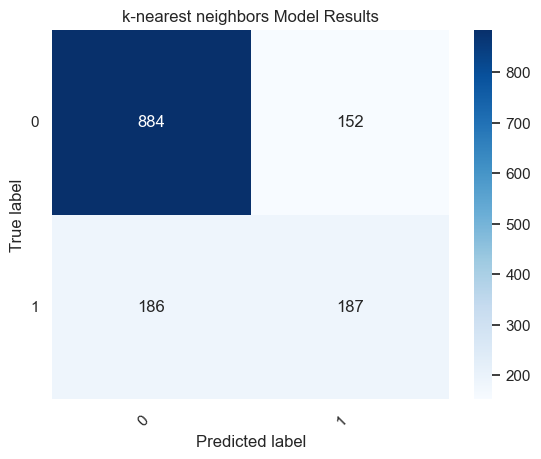

In [75]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_knn, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('k-nearest neighbors Model Results')

plt.show()   

In [76]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = knn.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

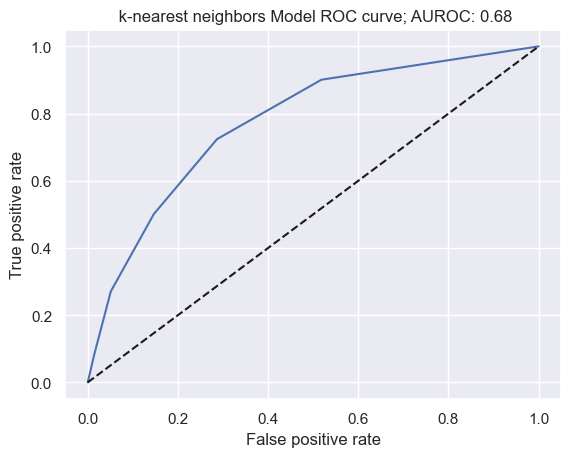

In [77]:
# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_knn), 2)

plt.title(f' k-nearest neighbors Model ROC curve; AUROC: {AUROC}');

plt.show()

In [78]:
y_pred_knn = knn.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("k-nearest neighbors Accuracy: ", accuracy_score(y_test, y_pred_knn) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the k-nearest neighbors classifier is: {precision_score(y_test, y_pred_knn) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the k-nearest neighbors classifier is: {recall_score(y_test, y_pred_knn) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the k-nearest neighbors classifier is: {f1_score(y_test, y_pred_knn) * 100}")

# f1['knn'] = f1_score(y_test, y_pred_knn)

k-nearest neighbors Accuracy:  76.01135557132717
Precision Score of the k-nearest neighbors classifier is: 55.16224188790561
Recall Score of the k-nearest neighbors classifier is: 50.134048257372655
F1 Score of the k-nearest neighbors classifier is: 52.52808988764045


In [79]:
# colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","blue"]

# sns.set_style("whitegrid")
# plt.figure(figsize=(16,6))
# plt.yticks(np.arange(0,100,12))
# plt.ylabel("Accuracy %")
# plt.xlabel("Algorithms")
# sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
# plt.show()


## Random Forest


In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [81]:
y_pred_rf = rf.predict(x_test)
y_pred_rf_prob = rf.predict_proba(x_test)


In [82]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_rf = confusion_matrix(y_test, y_pred_rf)

val_rf = np.mat(conmat_rf) 

classnames_rf = list(set(y_train))

df_cm_rf = pd.DataFrame(val_rf, index=classnames_rf, columns=classnames_rf)

print(df_cm_rf)

     0    1
0  949   87
1  194  179


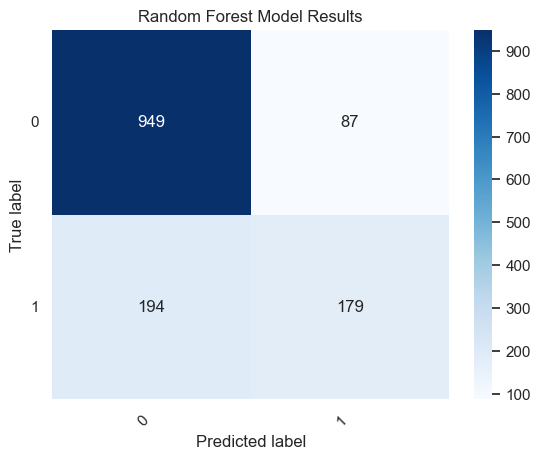

In [83]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_rf, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Random Forest Model Results')

plt.show()   

In [84]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = rf.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

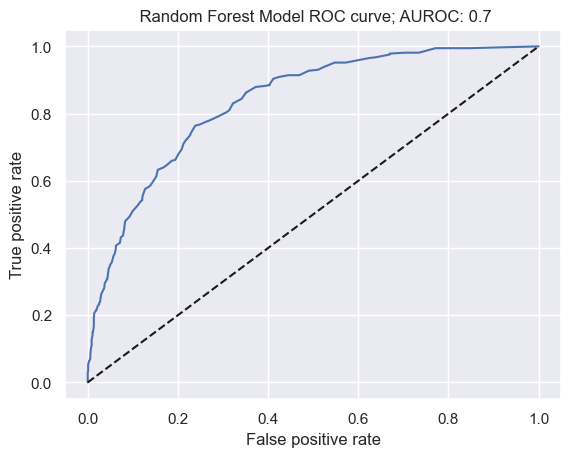

In [85]:
# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_rf), 2)

plt.title(f' Random Forest Model ROC curve; AUROC: {AUROC}');

plt.show()

In [86]:
# y_pred_rf = rf.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy Random Forest: ", accuracy_score(y_test, y_pred_rf) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Random Forest is: {precision_score(y_test, y_pred_rf) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Random Forest is: {recall_score(y_test, y_pred_rf) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Random Forest is: {f1_score(y_test, y_pred_rf) * 100}")

# f1['rf'] = f1_score(y_test, y_pred_rf)

Accuracy Random Forest:  80.0567778566359
Precision Score of the Random Forest is: 67.29323308270678
Recall Score of the Random Forest is: 47.98927613941019
F1 Score of the Random Forest is: 56.02503912363067


In [87]:
print("Accuracy: ", accuracy_score(y_test, y_pred_dt) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_svm) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_knn) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_rf) * 100)

Accuracy:  79.91483321504613
Accuracy:  81.47622427253371
Accuracy:  81.40525195173882
Accuracy:  76.01135557132717
Accuracy:  80.0567778566359


In [88]:
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_dt) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_svm) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_knn) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_rf) * 100}")

F1 Score of the classifier is: 61.80836707152497
F1 Score of the classifier is: 62.44604316546762
F1 Score of the classifier is: 60.42296072507553
F1 Score of the classifier is: 52.52808988764045
F1 Score of the classifier is: 56.02503912363067


for example:  
Now, suppose we have just started a supermarket, where the customers are less initially. We want a balance between the storage of apples and the sales of apples because we don’t know how many days it will take to finish all the stock. In this scenario, we need to pick the model with a higher F1-Score.

In [89]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_2,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.013889,0.115423,0.001275
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.472222,0.385075,0.215867
2,1,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0.027778,0.354229,0.010310
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.625000,0.239303,0.210241
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0.027778,0.521891,0.015330


# Step 7: Hyperparameter Tuning / Model Improvement

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

dt = DecisionTreeClassifier()
dt_random_grid =  GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=True)
dt_random_grid.fit(x_train, y_train)

y_pred_dt_tuned = dt_random_grid.predict(x_test)
y_pred_dt_tuned_prob = dt_random_grid.predict_proba(x_test)

print('Random Forest - Best Parameters: ', dt_random_grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Random Forest - Best Parameters:  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}


In [91]:
# y_pred_dt = dt.predict(x_test)


from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_dt = confusion_matrix(y_test, y_pred_dt_tuned)

val_dt = np.mat(conmat_dt) 

classnames_dt = list(set(y_train))

df_cm_dt= pd.DataFrame(val_dt, index=classnames_dt, columns=classnames_dt, )

print(df_cm_dt)
# print(conmat) 
# classnames





     0    1
0  967   69
1  205  168


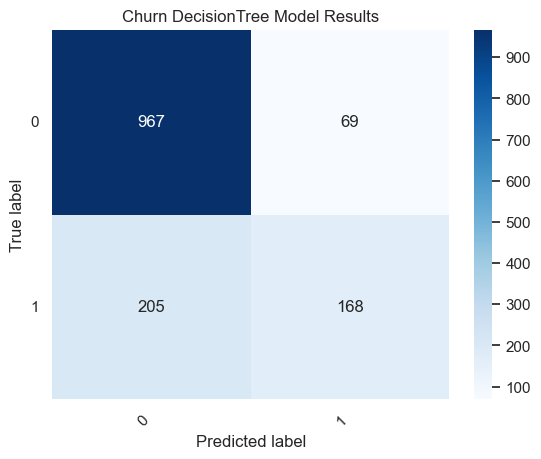

In [92]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_dt, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn DecisionTree Model Results')

plt.show()    



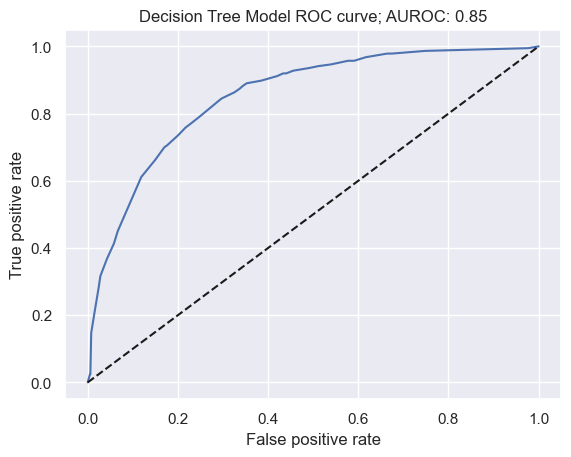

In [93]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_dt_proba = dt_random_grid.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)

# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_dt_proba), 2)

plt.title(f'Decision Tree Model ROC curve; AUROC: {AUROC}');

plt.show()

In [94]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy of the Decision Tree: ", accuracy_score(y_test, y_pred_dt_tuned) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Decision Tree classifier is: {precision_score(y_test, y_pred_dt_tuned) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Decision Tree classifier is: {recall_score(y_test, y_pred_dt_tuned) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Decision Tree classifier is: {f1_score(y_test, y_pred_dt_tuned) * 100}")


Accuracy of the Decision Tree:  80.55358410220013
Precision Score of the Decision Tree classifier is: 70.88607594936708
Recall Score of the Decision Tree classifier is: 45.0402144772118
F1 Score of the Decision Tree classifier is: 55.081967213114744


# k-nearest neighbors (Optimized)

For KNN GridSearch CV is used to determine the optimal number of neighbors (k) leading to the best model performance.

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)

y_pred_knn_tuned = knn_cv.predict(x_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(x_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 28} 



In [96]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_knn = confusion_matrix(y_test, y_pred_knn_tuned)

val_knn = np.mat(conmat_knn) 

classnames_knn = list(set(y_train))

df_cm_knn = pd.DataFrame(val_knn, index=classnames_knn, columns=classnames_knn,)

print(df_cm_knn)
# print(conmat) 
# classnames


     0    1
0  921  115
1  170  203


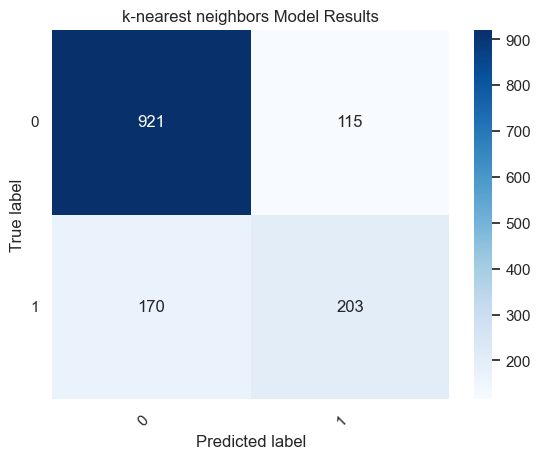

In [97]:

import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_knn, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('k-nearest neighbors Model Results')

plt.show()   



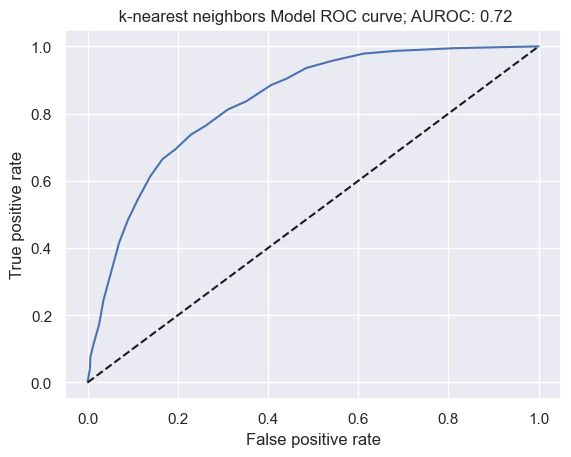

In [98]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = knn_cv.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_knn_tuned), 2)

plt.title(f' k-nearest neighbors Model ROC curve; AUROC: {AUROC}');

plt.show()



In [99]:
# y_pred_knn = knn.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("k-nearest neighbors Accuracy: ", accuracy_score(y_test, y_pred_knn_tuned) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the k-nearest neighbors classifier is: {precision_score(y_test, y_pred_knn_tuned) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the k-nearest neighbors classifier is: {recall_score(y_test, y_pred_knn_tuned) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the k-nearest neighbors classifier is: {f1_score(y_test, y_pred_knn_tuned) * 100}")

# f1['knn'] = f1_score(y_test, y_pred_knn)

k-nearest neighbors Accuracy:  79.77288857345636
Precision Score of the k-nearest neighbors classifier is: 63.83647798742138
Recall Score of the k-nearest neighbors classifier is: 54.42359249329759
F1 Score of the k-nearest neighbors classifier is: 58.755426917510846


# Logistic Regression  (Optimized)

For Logistic Regression GridSearchCV is used to determine the best model while applying different values of L1 or L2 regularization to turn the impact of non-meaningful feature to zero (L1) or to simplify the model by relativizing strong patterns that are picked up during training (L2).

In [100]:
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=1000)
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(x_train, y_train)

y_pred_logreg_tuned = logreg_tuned_gs.predict(x_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(x_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 4.2, 'penalty': 'l2'}


In [101]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_lr = confusion_matrix(y_test, y_pred_logreg_tuned)

val_lr = np.mat(conmat_lr) 

classnames_lr = list(set(y_train))

df_cm_lr = pd.DataFrame(val_lr, index=classnames_lr, columns=classnames_lr, )

print(df_cm_lr)
# print(conmat) 
# classnames

 


     0    1
0  929  107
1  154  219


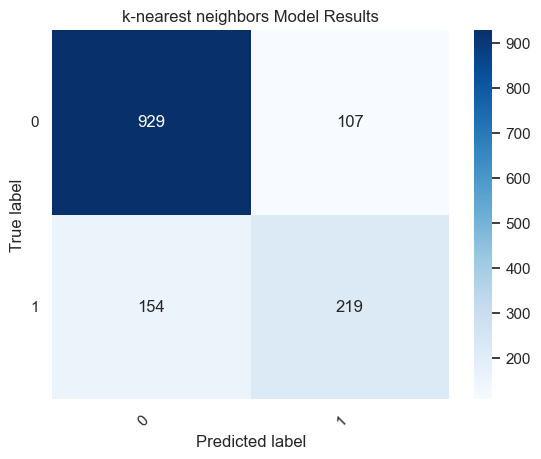

In [102]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_lr, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('k-nearest neighbors Model Results')

plt.show()   



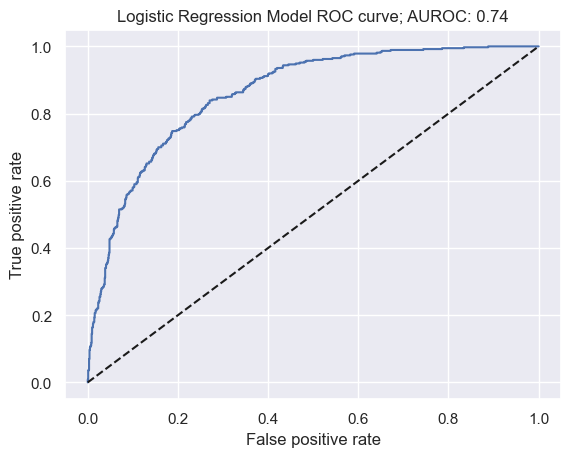

In [103]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = logreg_tuned_gs.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_logreg_tuned), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()



In [104]:
# y_pred_logreg_tuned = logreg_tuned_gs.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred_logreg_tuned) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Logistic Regression classifier is: {precision_score(y_test, y_pred_logreg_tuned) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Logistic Regression classifier is: {recall_score(y_test, y_pred_logreg_tuned) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Logistic Regression classifier is: {f1_score(y_test, y_pred_logreg_tuned) * 100}")

Accuracy:  81.47622427253371
Precision Score of the Logistic Regression classifier is: 67.17791411042946
Recall Score of the Logistic Regression classifier is: 58.71313672922251
F1 Score of the Logistic Regression classifier is: 62.66094420600857


# Random Forest (Optimized)

For the Random Forest model RandomizedSearchCV is used to optimize for several hyperparameters including n_estimators, max_features, max_depth, criterion and bootstrap.

In [105]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'n_estimators': np.arange(10, 2000, 10),
                'max_features': ['sqrt'],
                'max_depth': np.arange(10, 200, 10),
                'criterion': ['gini', 'entropy'],
                'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf,
                                    param_distributions=param_grid_rf,
                                   cv=5, verbose=0)
rf_random_grid.fit(x_train, y_train)

y_pred_rf_tuned = rf_random_grid.predict(x_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(x_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 1650, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}


In [106]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_rf = confusion_matrix(y_test, y_pred_rf_tuned)

val_rf = np.mat(conmat_rf) 

classnames_rf = list(set(y_train))

df_cm_rf = pd.DataFrame(val_rf, index=classnames_rf, columns=classnames_rf)

print(df_cm_rf)



     0    1
0  946   90
1  178  195


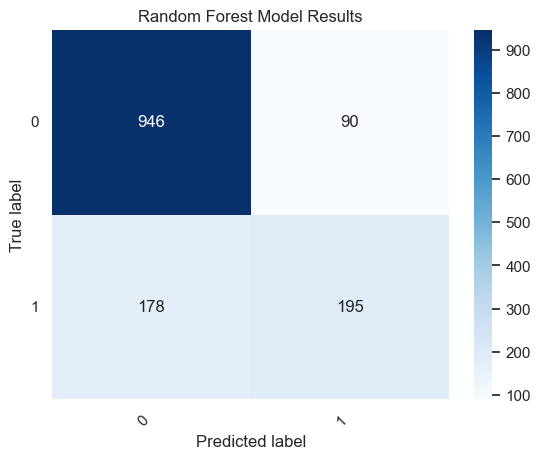

In [107]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_rf, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Random Forest Model Results')

plt.show()   





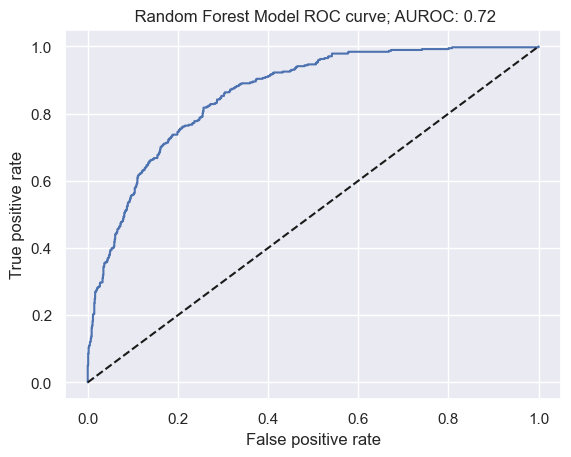

In [108]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = rf_random_grid.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_rf_tuned), 2)

plt.title(f' Random Forest Model ROC curve; AUROC: {AUROC}');

plt.show()



In [109]:
# y_pred_rf = rf.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy Random Forest: ", accuracy_score(y_test, y_pred_rf_tuned) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Random Forest is: {precision_score(y_test, y_pred_rf_tuned) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Random Forest is: {recall_score(y_test, y_pred_rf_tuned) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Random Forest is: {f1_score(y_test, y_pred_rf_tuned) * 100}")

# f1['rf'] = f1_score(y_test, y_pred_rf)

Accuracy Random Forest:  80.97941802696948
Precision Score of the Random Forest is: 68.42105263157895
Recall Score of the Random Forest is: 52.27882037533512
F1 Score of the Random Forest is: 59.27051671732523


# Support Vector Machine (Optimized)

For SVM GridSearchCV is used to determine the C value for the optimal margin around the support vector.

In [110]:
param_grid_svm = {'C': np.arange(.1, 3, .1)}
support_vector_m = SVC(kernel='linear', probability=True)
support_vector_m_tuned = GridSearchCV(support_vector_m,
                                       param_grid_svm, cv=5)
support_vector_m_tuned.fit(x_train, y_train)

y_pred_svm_tuned = support_vector_m_tuned.predict(x_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(x_test)

print('SVM best C value', support_vector_m_tuned.best_params_, '\n')

SVM best C value {'C': 0.1} 



In [111]:
from sklearn.metrics import confusion_matrix
# Let’s generate our confusion matrix array and store it in a variable called conmat:

conmat_svm = confusion_matrix(y_test, y_pred_svm_tuned)

val_svm = np.mat(conmat_svm) 

classnames_svm = list(set(y_train))

df_cm_svm = pd.DataFrame(val_svm, index=classnames_svm, columns=classnames_svm,)

print(df_cm_svm)
# print(conmat) 
# classnames



     0    1
0  937   99
1  151  222


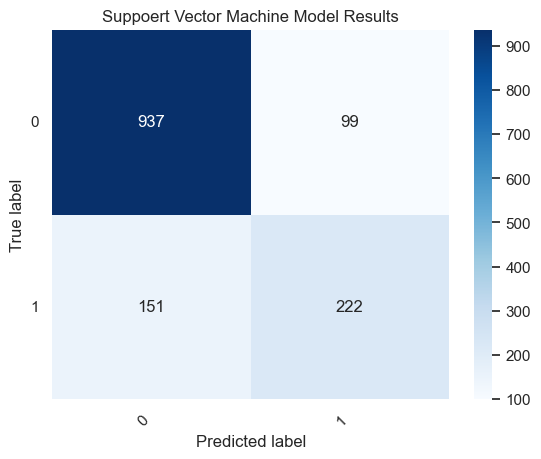

In [112]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(conmat_svm, annot=True, cmap="Blues", fmt='g') 

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Suppoert Vector Machine Model Results')

plt.show()    



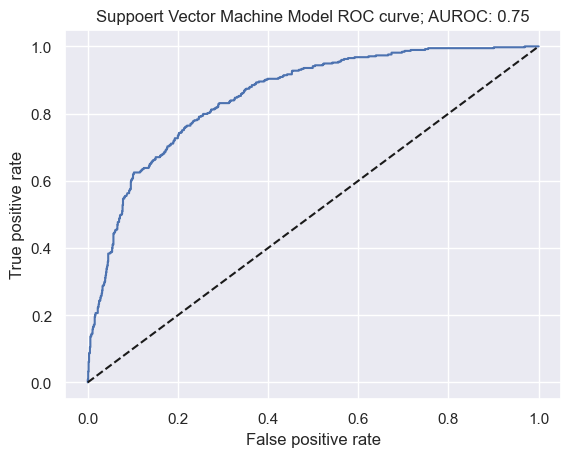

In [113]:
# Let’s start by calculating the AUROC. Let’s import the roc_curve and roc_auc_score methods from the metrics module:

from sklearn.metrics import roc_curve, roc_auc_score
# Next, let’s generate predicted probabilities on our test set using our trained model:

y_pred_proba = support_vector_m_tuned.predict_proba(np.array(x_test))[:,1]
# We can then calculate the false positive rate (for) and true positive rate (tpr) for different probability thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Finally, we can plot our ROC curve:

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_svm_tuned), 2)

plt.title(f'Suppoert Vector Machine Model ROC curve; AUROC: {AUROC}');

plt.show()


In [114]:
y_pred_svm = svm.predict(x_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy of Suppoert Vector Machine: ", accuracy_score(y_test, y_pred_svm_tuned) * 100)

# Calculating the precision score of classifier
print(f"Precision Score of the Suppoert Vector Machine is: {precision_score(y_test, y_pred_svm_tuned) * 100}")

# Calculating the recall score of classifier
print(f"Recall Score of the Suppoert Vector Machine is: {recall_score(y_test, y_pred_svm_tuned) * 100}")

# Calculating the F1 score of classifier
print(f"F1 Score of the Suppoert Vector Machine is: {f1_score(y_test, y_pred_svm_tuned) * 100}")

Accuracy of Suppoert Vector Machine:  82.2569198012775
Precision Score of the Suppoert Vector Machine is: 69.1588785046729
Recall Score of the Suppoert Vector Machine is: 59.51742627345844
F1 Score of the Suppoert Vector Machine is: 63.976945244956774


In [131]:

print("Decision Tree")
print("Accuracy without tuned: ",accuracy_score(y_test, y_pred_dt) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_dt_tuned) * 100 ,"\n")

print("Logistic Regression classifier ")
print("Accuracy without tuned: ", accuracy_score(y_test, y_pred) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_logreg_tuned) * 100 ,"\n")

print("Support Vector Machine")
print("Accuracy without tuned: ", accuracy_score(y_test, y_pred_svm) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_svm_tuned) * 100 ,"\n")

print("K Nearest Neighbors")
print("Accuracy without tuned: ", accuracy_score(y_test, y_pred_knn) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_knn_tuned) * 100 ,"\n")

print("Random Forest")
print("Accuracy without tuned: ", accuracy_score(y_test, y_pred_rf) * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred_rf_tuned) * 100 ,"\n")

Decision Tree
Accuracy without tuned:  79.91483321504613
Accuracy:  80.55358410220013 

Logistic Regression classifier 
Accuracy without tuned:  81.47622427253371
Accuracy:  81.47622427253371 

Support Vector Machine
Accuracy without tuned:  81.40525195173882
Accuracy:  82.2569198012775 

K Nearest Neighbors
Accuracy without tuned:  76.01135557132717
Accuracy:  79.77288857345636 

Random Forest
Accuracy without tuned:  80.0567778566359
Accuracy:  80.97941802696948 



In [126]:
print("Decision Tree")
print(f"F1 Score of the classifier is without tuned: {f1_score(y_test, y_pred_dt) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_dt_tuned) * 100} \n")

print("Logistic Regression classifier ")
print(f"F1 Score of the classifier is without tuned: {f1_score(y_test, y_pred) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_logreg_tuned) * 100} \n")

print("Support Vector Machine")
print(f"F1 Score of the classifier is without tuned: {f1_score(y_test, y_pred_svm) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_svm_tuned) * 100} \n")

print("K Nearest Neighbors")
print(f"F1 Score of the classifier is without tuned: {f1_score(y_test, y_pred_knn) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_knn_tuned) * 100} \n")

print("Random Forest")
print(f"F1 Score of the classifier is without tuned: {f1_score(y_test, y_pred_rf) * 100}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred_rf_tuned) * 100} \n")

Decision Tree
F1 Score of the classifier is without tuned: 61.80836707152497
F1 Score of the classifier is: 55.081967213114744 

Logistic Regression classifier 
F1 Score of the classifier is without tuned: 62.44604316546762
F1 Score of the classifier is: 62.66094420600857 

Support Vector Machine
F1 Score of the classifier is without tuned: 60.42296072507553
F1 Score of the classifier is: 63.976945244956774 

K Nearest Neighbors
F1 Score of the classifier is without tuned: 52.52808988764045
F1 Score of the classifier is: 58.755426917510846 

Random Forest
F1 Score of the classifier is without tuned: 56.02503912363067
F1 Score of the classifier is: 59.27051671732523 



# Summary
Looking at model results, the best accuracy on the test set is achieved by the Support Vector Machine with  82.2569198012775 %. Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best score on jointly precision and recall. This would be the Support Vector Machine with a F1 score of 63.976945244956774 .

Given the scores of the best performing models, it can be observed that F1 scores are not much above 50%. Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more business value.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.